# Crime In India 

This dataset contains complete information about various aspects of crimes happened in India from 2001. There are many factors that can be analysed from this dataset. 

# Crime Against Schedule Castes and Schedule Tribes In India - A Analysis

For this project will be analyzing crimes commited against Schedule Castes and Schedule Tribes varying across Districts and States of India from 2001 until 2013

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

### Importing the data

In [3]:
import pandas as pd 
import numpy as np

d1 = pd.read_csv(r'C:\Users\User\Desktop\Projects\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
d2 = pd.read_csv(r'C:\Users\User\Desktop\Projects\02_01_District_wise_crimes_committed_against_SC_2013.csv')

d3 = pd.read_csv(r'C:\Users\User\Desktop\Projects\02_District_wise_crimes_committed_against_ST_2001_2012.csv')
d4 = pd.read_csv(r'C:\Users\User\Desktop\Projects\02_District_wise_crimes_committed_against_ST_2013.csv')

d1.shape, d2.shape, d3.shape, d4.shape

((9018, 13), (823, 13), (9018, 13), (823, 13))

# Crimes against SC

#### Combining d1 and d2

In [4]:
df_sc = pd.concat([d1, d2])
df_sc.shape

(9841, 13)

In [5]:
df_sc.head()

STATE/UT       DISTRICT  Year  Murder  Rape  \
0  ANDHRA PRADESH       ADILABAD  2001       0     1   
1  ANDHRA PRADESH      ANANTAPUR  2001       0     4   
2  ANDHRA PRADESH       CHITTOOR  2001       3     3   
3  ANDHRA PRADESH       CUDDAPAH  2001       0     3   
4  ANDHRA PRADESH  EAST GODAVARI  2001       1     3   

   Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                         4        0        0      0     3   
1                         0        0        0      0    49   
2                         0        0        0      0    38   
3                         0        0        0      0    20   
4                         0        0        0      0     3   

   Prevention of atrocities (POA) Act  Protection of Civil Rights (PCR) Act  \
0                                   0                                    15   
1                                  21                                     0   
2                                  36                                     0   
3                                  52                                     0   
4                                  12                                    63   

   Other Crimes Against SCs  
0                        32  
1                        53  
2                        34  
3                        25  
4                         7

In [6]:
df_sc.describe(include=['O'])

STATE/UT DISTRICT
count            9841     9841
unique             70      832
top     UTTAR PRADESH    TOTAL
freq              878      456

From the above description we can see that there are 70 States considered, which isn't possible, hence we need to solve this issue by checking the state names

In [7]:
df_sc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

State names are repeated in capital. We need to treat them.

In [8]:
df_sc['STATE/UT'] = df_sc['STATE/UT'].str.capitalize()
df_sc['DISTRICT'] = df_sc['DISTRICT'].str.capitalize()

df_sc['STATE/UT'].unique()

array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A & n islands', 'Chandigarh', 'D & n haveli',
       'Daman & diu', 'Delhi', 'Lakshadweep', 'Puducherry', 'A&n islands',
       'D&n haveli', 'Delhi ut'], dtype=object)

In [9]:
df_sc.describe(include=['O'])

STATE/UT DISTRICT
count            9841     9841
unique             38      832
top     Uttar pradesh    Total
freq              955      456

Repetetion is still unresolved

In [10]:
df_sc['STATE/UT']=df_sc['STATE/UT'].replace('D & n haveli','D&n haveli')
df_sc['STATE/UT']=df_sc['STATE/UT'].replace('A & n islands','A&n islands')
df_sc['STATE/UT']=df_sc['STATE/UT'].replace('Delhi','Delhi ut')

df_sc['STATE/UT'].unique()

array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A&n islands', 'Chandigarh', 'D&n haveli',
       'Daman & diu', 'Delhi ut', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [11]:
df_sc.describe(include=['O'])

STATE/UT DISTRICT
count            9841     9841
unique             35      832
top     Uttar pradesh    Total
freq              955      456

No more repetetions in the STATE/UT variable

# Exploraratory Data Analysis

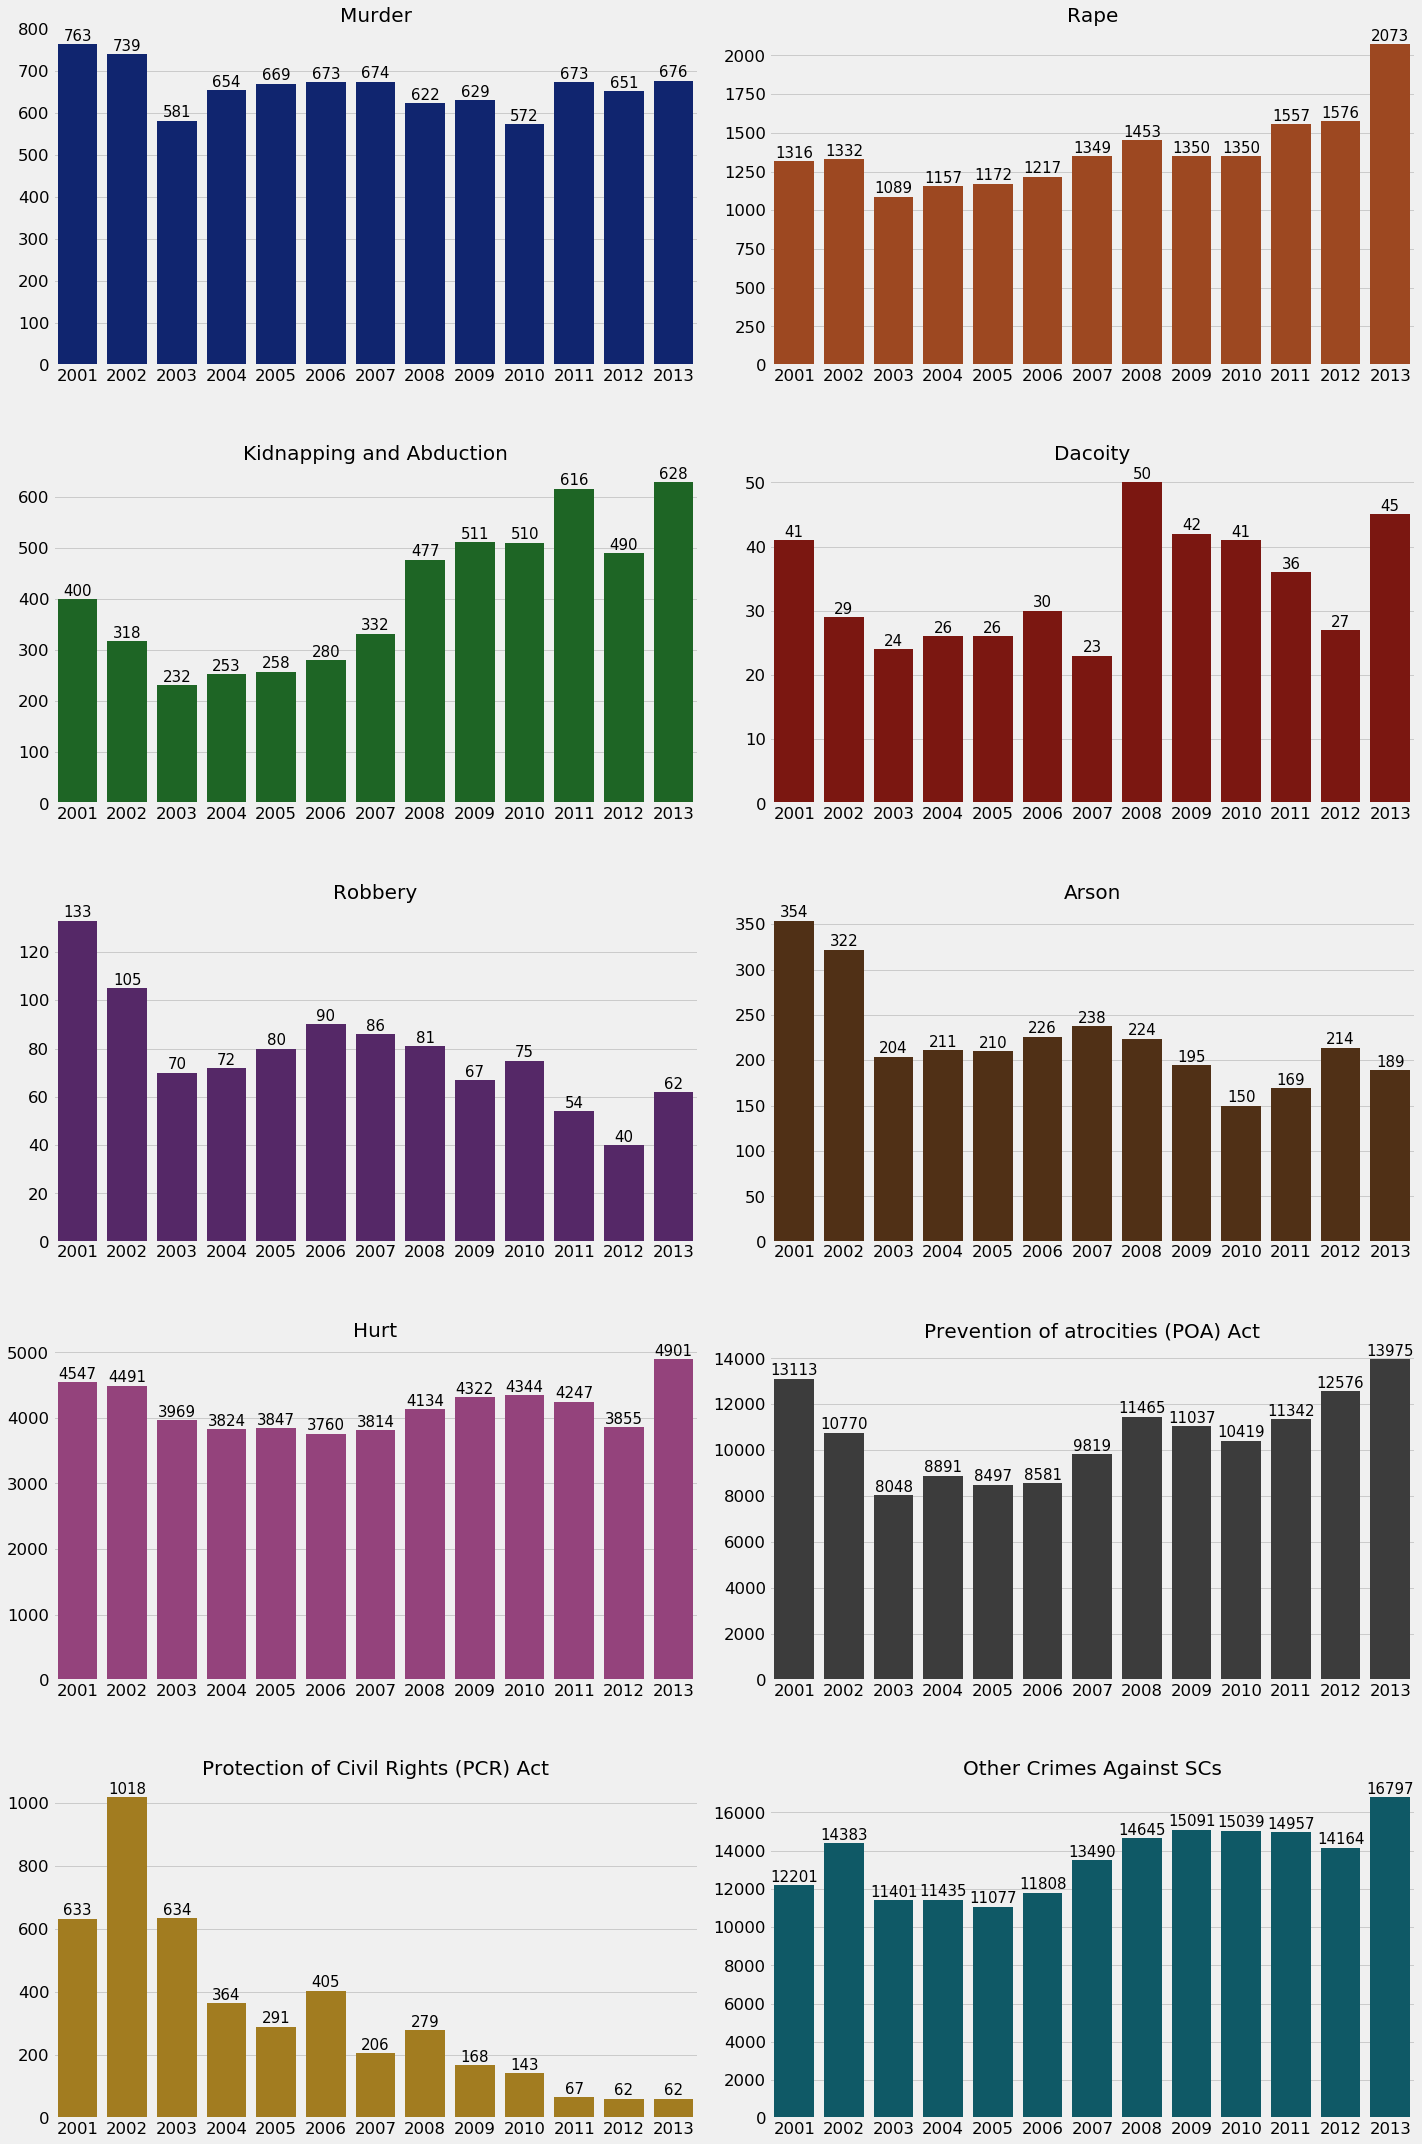

In [12]:
sc_crime = df_sc[df_sc.DISTRICT == 'Total']
sc_crime = sc_crime.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

#Plotting Graphs
import itertools
sns.set_context("talk")
plt.style.use("fivethirtyeight")
palette = itertools.cycle(sns.color_palette("dark"))
columns = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']
plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')
for i,column in enumerate(columns):
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= sc_crime,x='Year',y= column ,color=next(palette) )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Looking at the above graphs we can correctly draw some inferences:

- Murdur crimes against schedule cast remain constant through the span of 12 years, without experiencing an fall.
- Rape crimes against schedule cast were less in number during the earlier year's however, they are increasing in the latest years.
- Kidnapping and Abduction crimes against schedule cast have increased vastly.
- Robbery crimes against schedule cast have decreased with time.
- Arson crimes against schedule cast have decreased with time.
- Hurt crimes against schedule cast remain constant through the span of 12 years, without experiencing an fall.
- Other crimes against schedule cast are at a rise

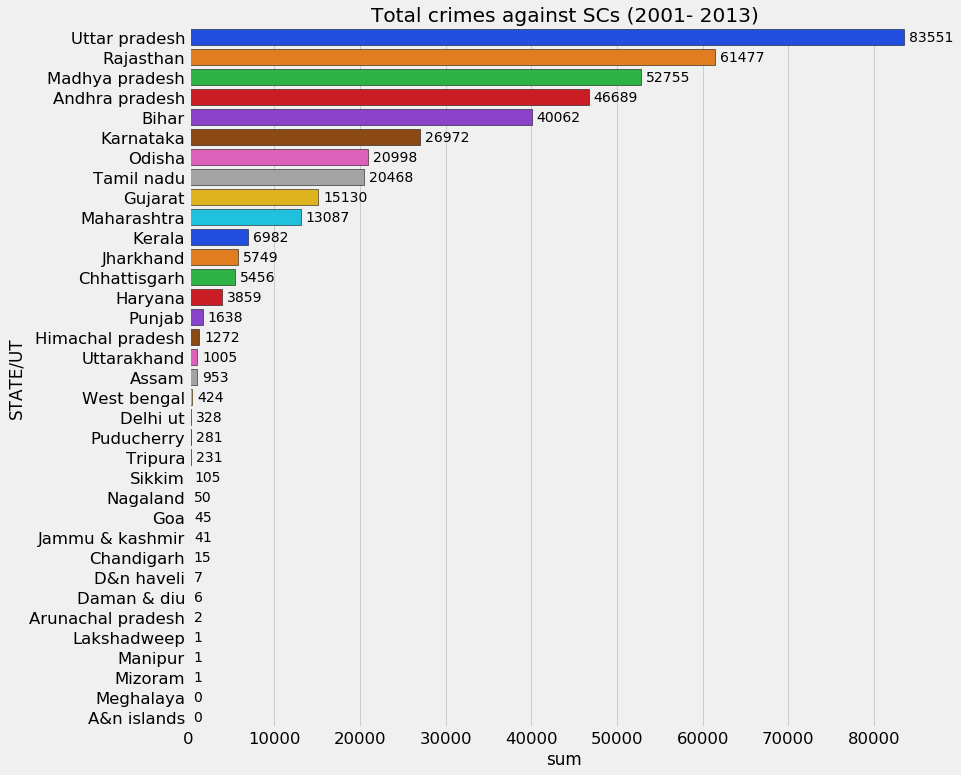

In [13]:
stateyr = df_sc[df_sc.DISTRICT == 'Total']
stateyr = stateyr.groupby(['Year','STATE/UT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()
stateyr['sum'] =  stateyr.iloc[:, 2:].sum(axis=1)
stateyr2 = stateyr.groupby('STATE/UT')['sum'].sum().reset_index()
stateyr2 = stateyr2.sort_values('sum', ascending = False)

plt.figure(figsize = (12,12))
sns.set_context("talk")
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'sum', y = 'STATE/UT', data = stateyr2, palette = 'bright', edgecolor = 'black')
plt.title('Total crimes against SCs (2001- 2013)')
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### Looking at the above graph we can conclude that:

- The state of Uttar Pradesh experiences the maximum number of crimes against against the schedule caste community (83,551).
- The state of Rajasthan experiences the second most crimes against against the schedule caste community (61,447).
- The state of Madhya Pradesh experiences the third most crimes against against the schedule caste community (52,755)

- The state of Meghalaya and Andaman&Nicobar Islands experience no crime against the schedule caste community.

Uttarpradesh , Rajasthan , Madhyapradesh , Andhrapradesh , Bihar , Karnatka , Odisha , Tamilnadu , Gujrat , Maharashtra has the more number of cases of crime against SC. Lets see the crimes in these states yearwise.

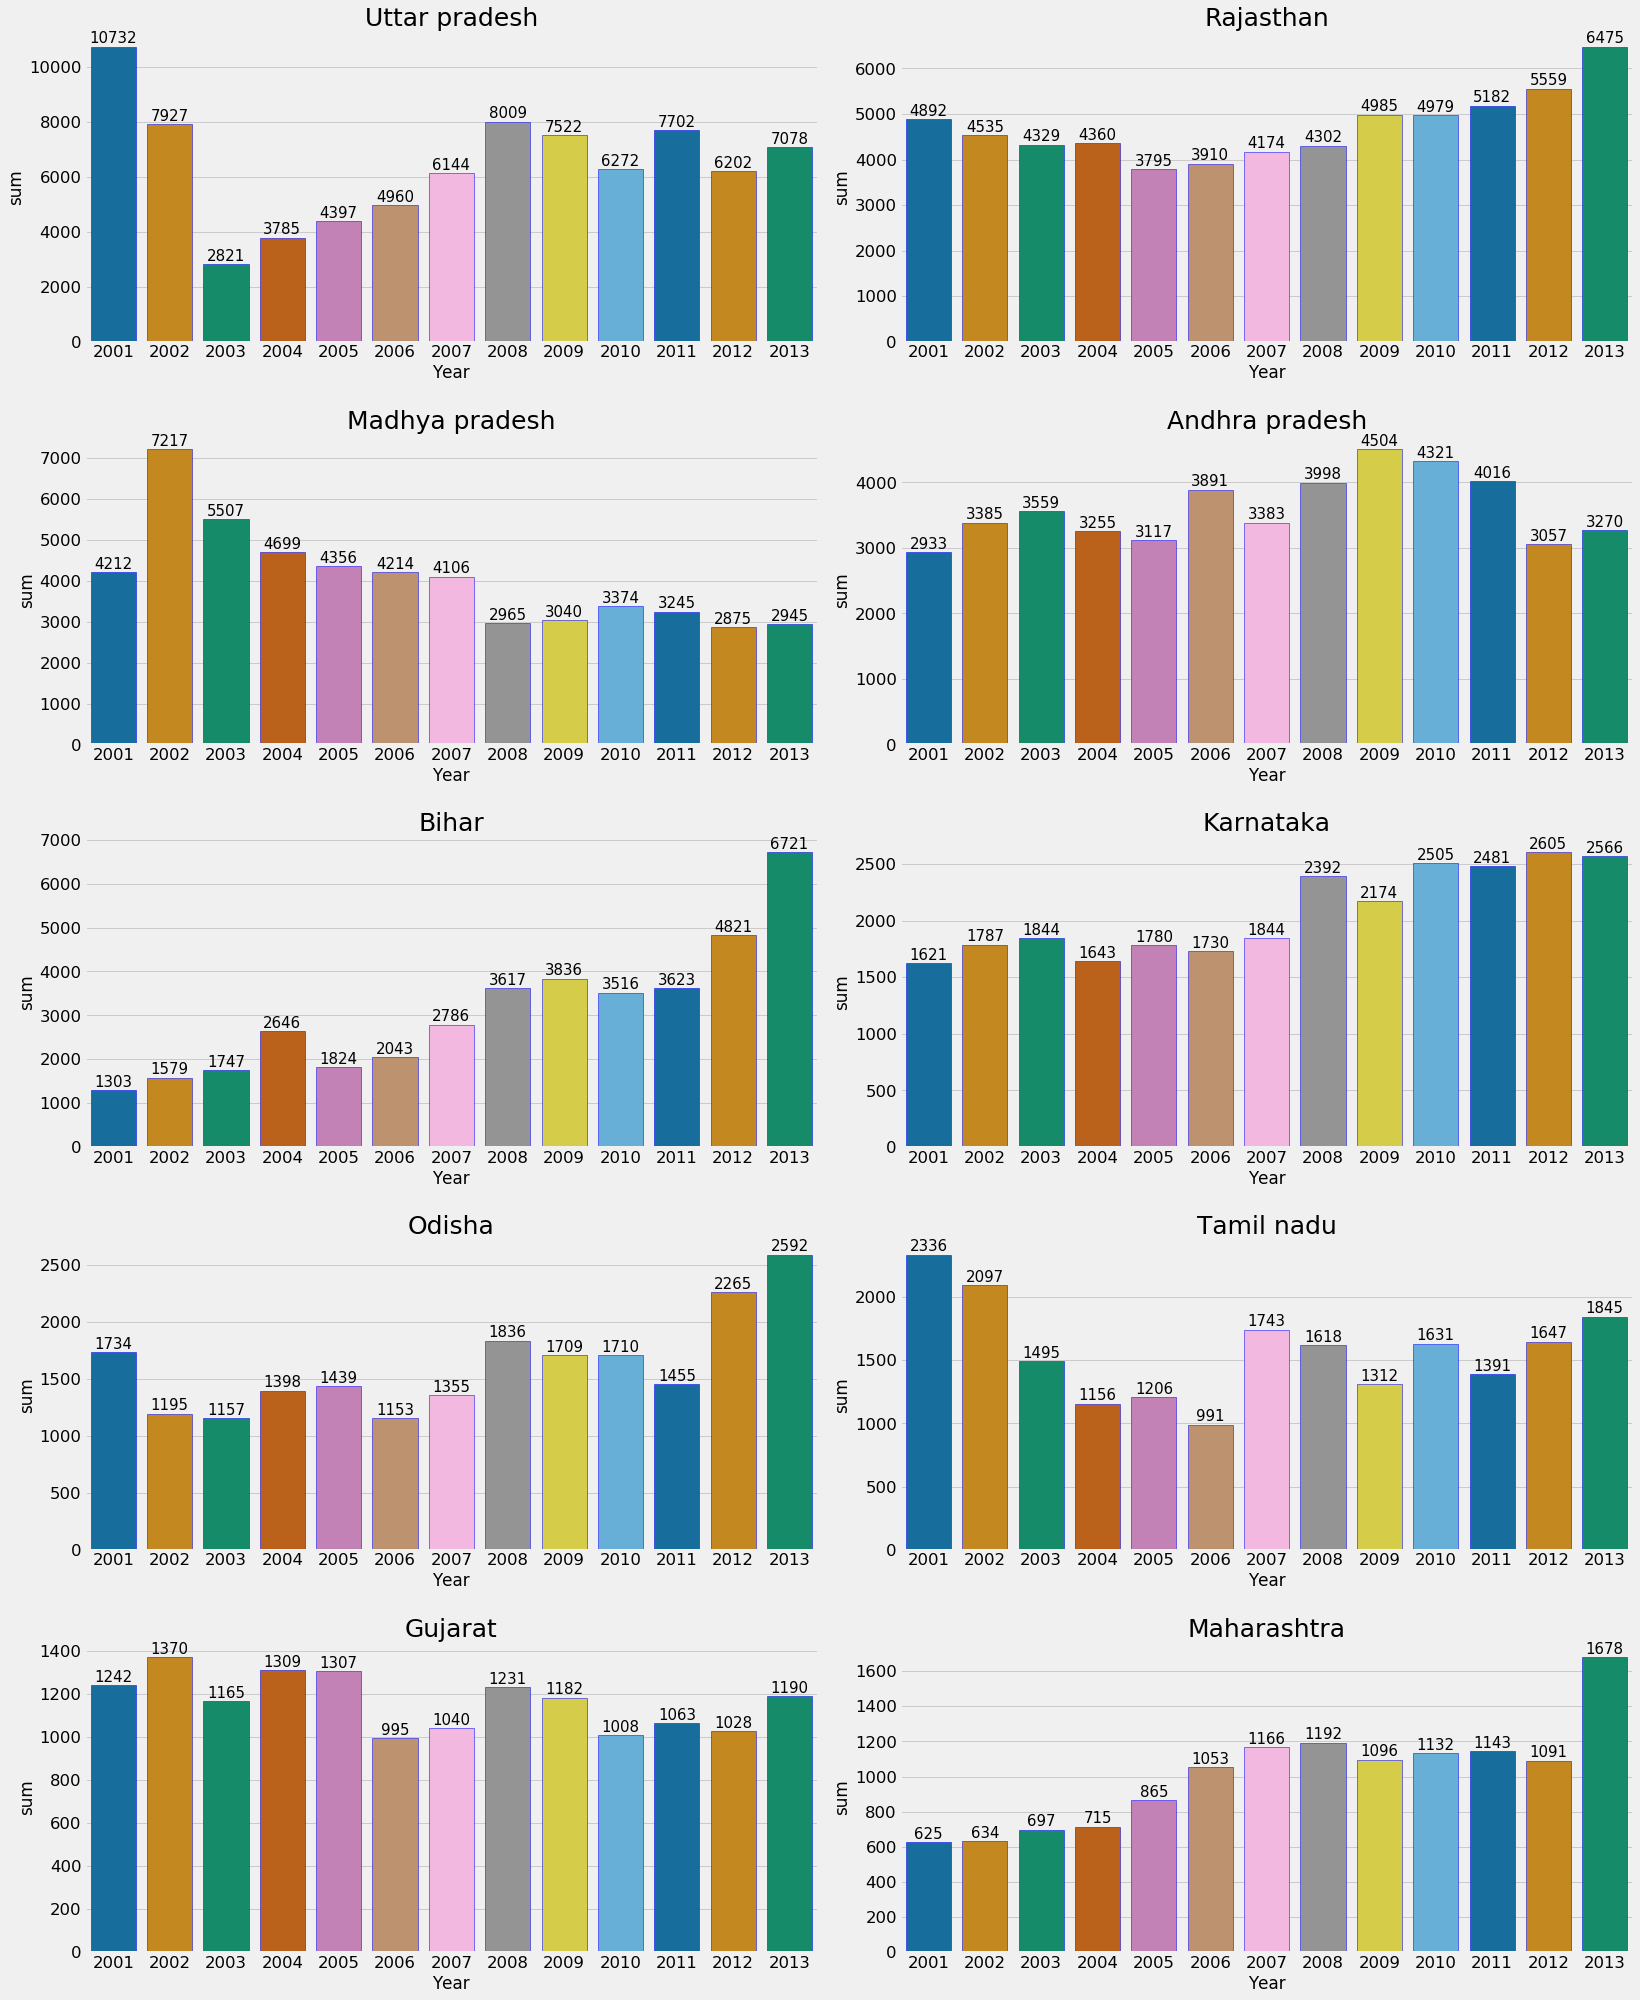

In [14]:
states = ['Uttar pradesh','Rajasthan' ,'Madhya pradesh' , 'Andhra pradesh', 'Bihar', 'Karnataka' , 'Odisha' , 'Tamil nadu','Gujarat', 'Maharashtra']
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (23,28))

for i, s in enumerate(states):
    plt.subplot(5,2,i+1)
    stateyr3 = stateyr[stateyr['STATE/UT'] == s]
    ax = sns.barplot(x = 'Year' , y = 'sum' , data = stateyr3,ci=None , palette = 'colorblind' , edgecolor = 'blue')
    plt.title(s , size = 25)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
plt.tight_layout()
plt.subplots_adjust(hspace= .3)

## Looking at the above graph we can conclude that:

#### Uttar Pradesh 
- In the initial year's experienced the higest number of crime against the scheducle caste community.
- The number of crime against the scheducle caste community decreased measurbly during the year 2002-2003.
- After 2003 the crime against the scheducle caste community increased constantly.
- The crime against the scheducle caste community do not observe any fall in the recent years.

#### Rajasthan
- Rajasthan experience a very small drop in crime against the scheducle caste community from the year 2001 to 2005.
- After 2005 the crimes increased gradually and have reached the peak.

#### Madhya Pradesh
- The number of crime against the scheducle caste community increased measurbly during the year 2001-2002.
- After 2001 the crime against the scheducle caste community seem to be decreasing constantly.
- The crime against the scheducle caste community is at its lowest in the recent years.

#### Andhra Pradesh
- The crime against the scheducle caste community do not observe any noticable fall or rise throughout the span of 12 year's.
- The crime rate remains constant yet high.

#### Bihar
- It experienced lowest crime rate in initial years but since 2001 it has constantly rise in its crime rate.

#### Karnataka
- Is experiencing a constant rate of crime against the scheducle caste community.

#### Odisha
- Odisha had comparatively low crime rate against the scheducle caste community during initial years.
- Observes a high peak of crimes in 2013.

#### Tamil Nadu
- In the initial year's experienced the higest number of crime against the scheducle caste community.
- The number of crime against the scheducle caste community decreased measurbly during the year 2002-2006.
- After 2006 the crime against the scheducle caste community increased abruptly.
- The crime against the scheducle caste community do not observe any fall in the recent years.

#### Gujrat
- Is experiencing a constant rate of crime against the scheducle caste community.

#### Maharashtra
- Maharashtra had comparatively low crime rate against the scheducle caste community during initial years.
- After 2004 the crime against the scheducle caste community increased constantly.
- The crime against the scheducle caste community do not observe any fall in the recent years.
- Observes a high peak of crimes in 2013.

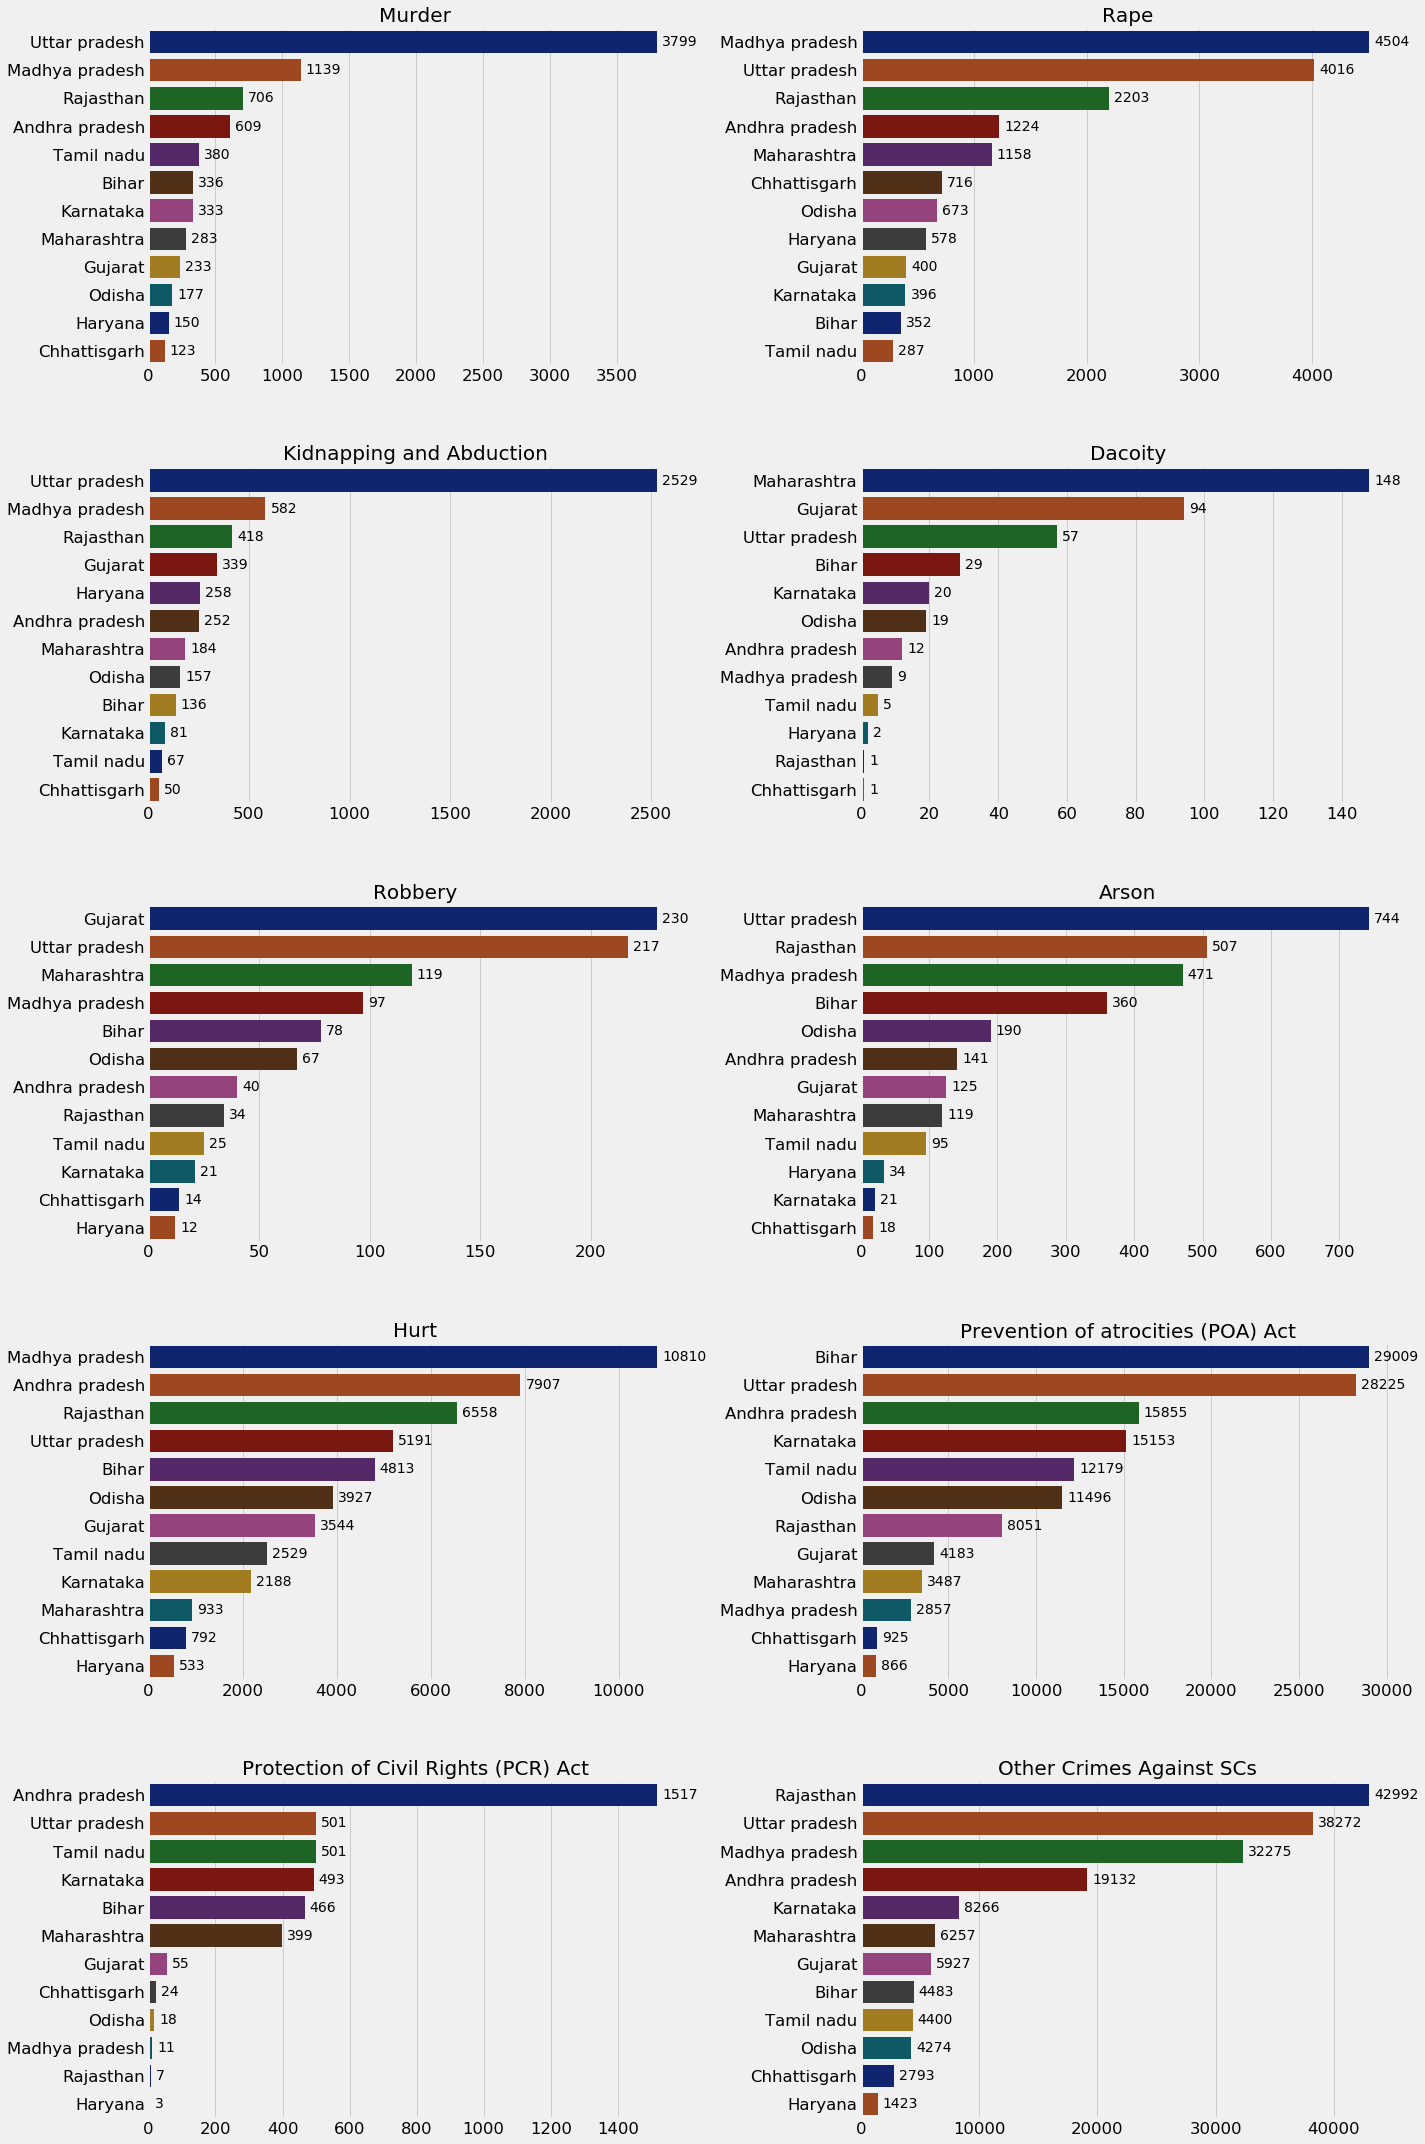

In [15]:
scs = df_sc[df_sc.DISTRICT == 'Total']
scs = scs.groupby(['STATE/UT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

scs1 = scs[(scs.Murder > 100) & (scs.Rape > 100)]
sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    scs1 = scs1.sort_values(column,ascending = False)
    plt.subplot(5,2,i+1)
    ax = sns.barplot(data= scs1,x= column ,y='STATE/UT',palette = 'dark' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center") 
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Looking at the above graphs we can conclude that:

#### Murder 
Following states experience the highest number of murders - 
- Uttar Pradesh
- Madhya Pradesh
- Rajasthan

#### Rape
Following states experience the highest number of rape - 
- Madhya Pradesh 
- Uttar Pradesh
- Rajasthan

#### Kidnapping and Abduction
Following states experience the highest number of Kidnappins - 
- Uttar Pradesh
- Madhya Pradesh
- Rajasthan

#### Dacoity
Following states experience the highest number of Dacoity - 
- Maharastra
- Gujrat
- Uttar Pradesh

#### Robbery
Following states experience the highest number of robbery - 
-  Gujrat
- Uttar Pradesh
- Maharashtra

#### Arson
Following states experience the highest number of arson - 
- Uttar Pradehs
- Rajasthan
- Madhya Pradesh

#### Hurt
Following states experience the highest number of hurt - 
- Madhya Pradesh
- Andra Pradesh
- Rajasthan

#### Prevention of Atrocities (POA) Act
Following states experience the highest number of POA crimes - 
- Bihar
- Uttar Pradesh
- Andhra Pradesh


#### Protection of Civil Rights (PCR) Act
Following states experience the highest number of PCR crimes - 
- Andhra Pradesh
- Uttar Pradesh
- Tamil Nadu


#### Other Crimes Against SCs
Following states experience the highest number of  - 
- Rajahthan
- Uttar Pradesh
- Madhya Pradesh

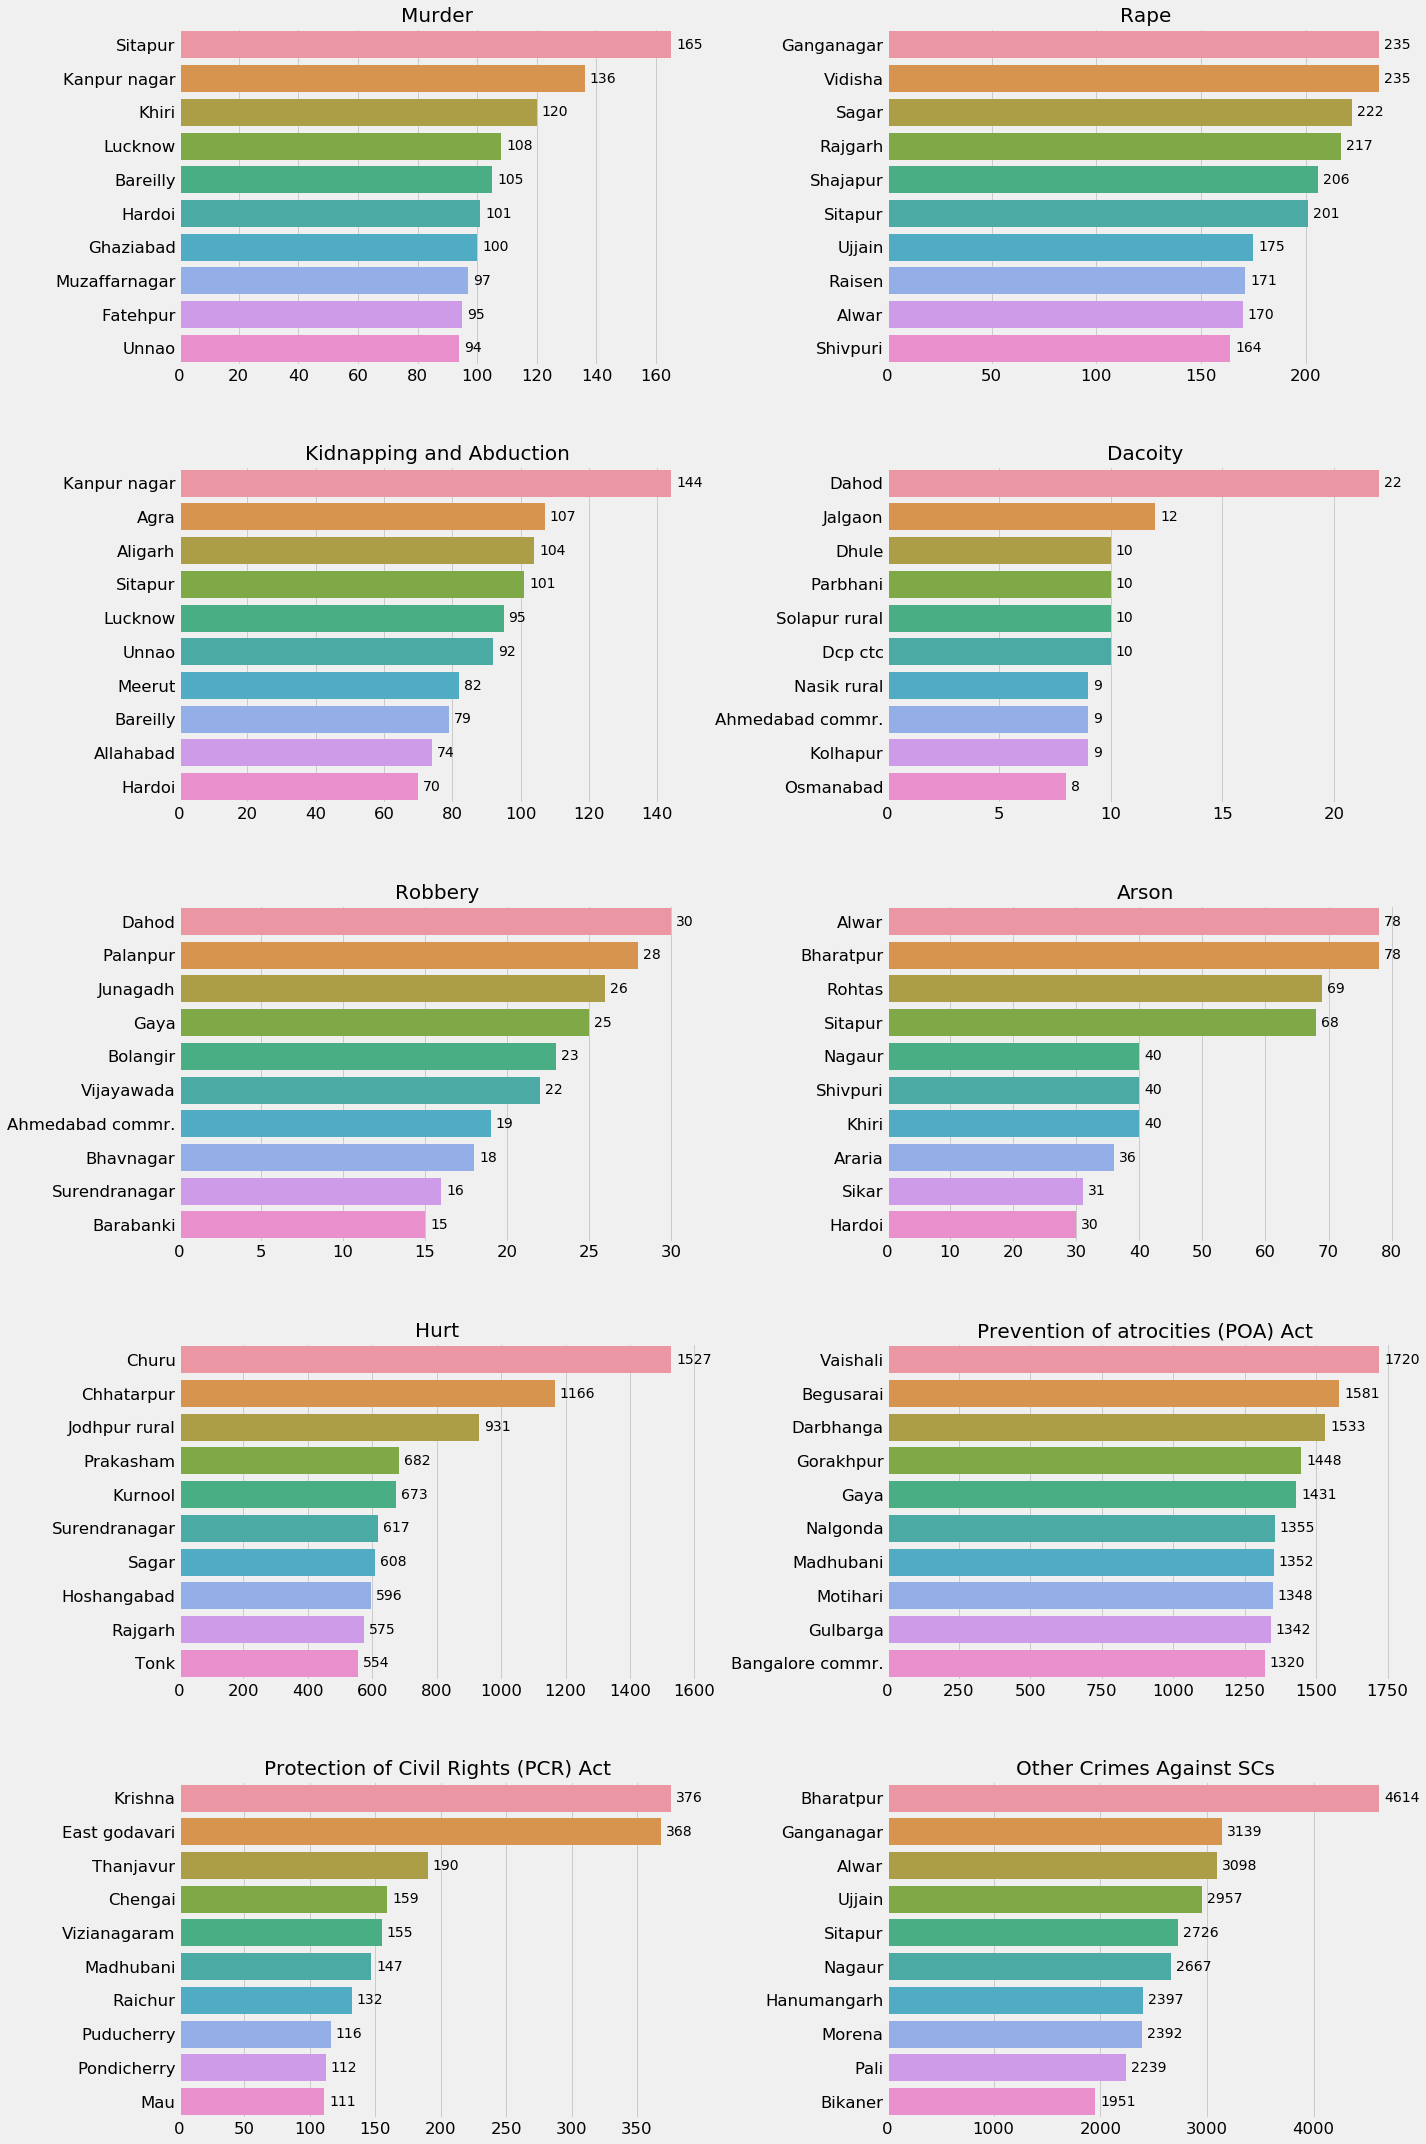

In [16]:
scd = df_sc[df_sc.DISTRICT != 'Total']
scd = scd.groupby(['DISTRICT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()


sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    scd1 = scd.sort_values(column,ascending = False)
    scd1 = scd1.head(10)
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= scd1,x= column ,y='DISTRICT' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Looking at the above graphs we can conclude that:

#### Murder 
Following district experience the highest number of murders - 
- Sitapur

#### Rape
Following district experience the highest number of rape - 
- GangaNagar 

#### Kidnapping and Abduction
Following district experience the highest number of Kidnappins - 
- Kanpur Nagar

#### Dacoity
Following district experience the highest number of Dacoity - 
- Dahod

#### Robbery
Following district experience the highest number of robbery - 
-  Dahod

#### Arson
Following district experience the highest number of arson - 
- Alwar

#### Hurt
Following district experience the highest number of hurt - 
- Churu

#### Prevention of Atrocities (POA) Act
Following district experience the highest number of POA crimes - 
- Vaishali

#### Protection of Civil Rights (PCR) Act
Following district experience the highest number of PCR crimes - 
- Krishna

#### Other Crimes Against SCs
Following district experience the highest number of  - 
- BharatPur

### Rape Crimes distributed State and District wise

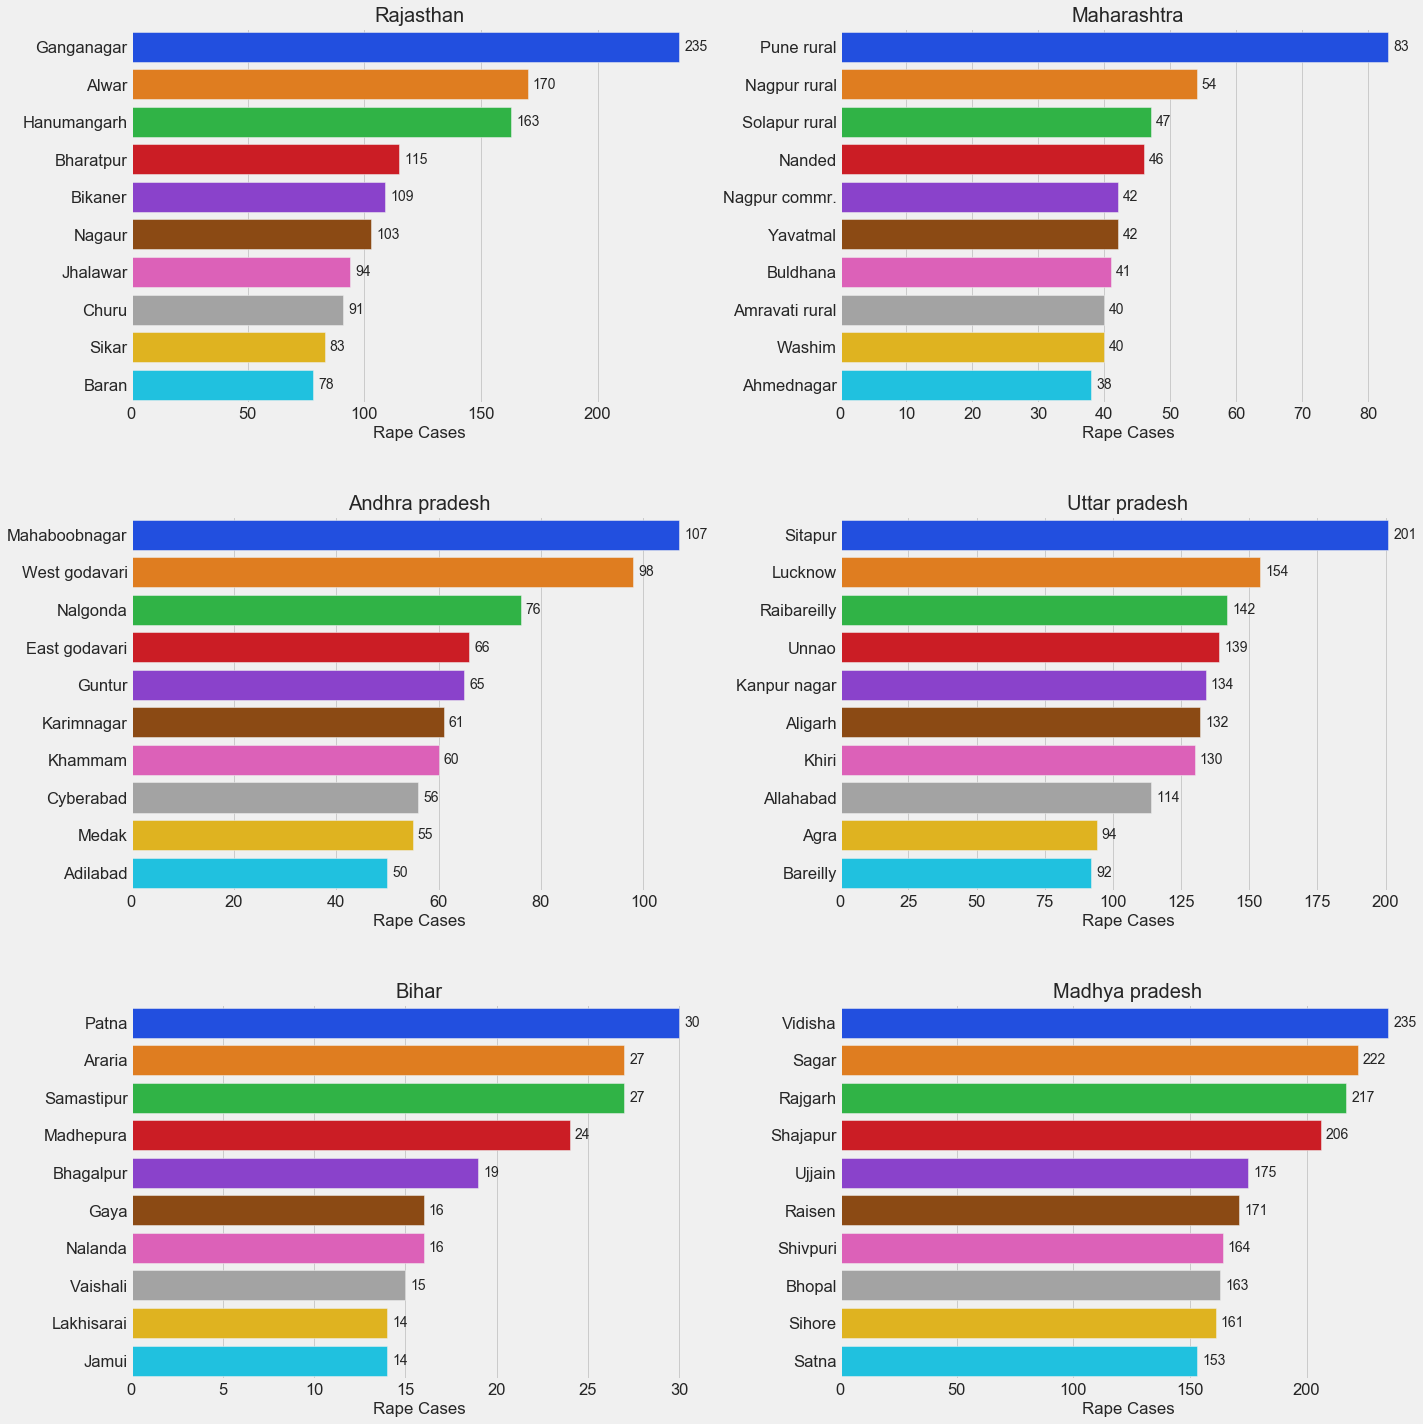

In [17]:
scsd = df_sc[df_sc.DISTRICT!= 'Total']
scsd = scsd.groupby(['STATE/UT', 'DISTRICT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()


states = ['Rajasthan', 'Maharashtra', 'Andhra pradesh', 'Uttar pradesh', 'Bihar','Madhya pradesh']
sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Rape', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Rape' ,y= 'DISTRICT',palette = 'bright' )
    plt.xlabel('Rape Cases')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Murder crimes distributed State and District wise

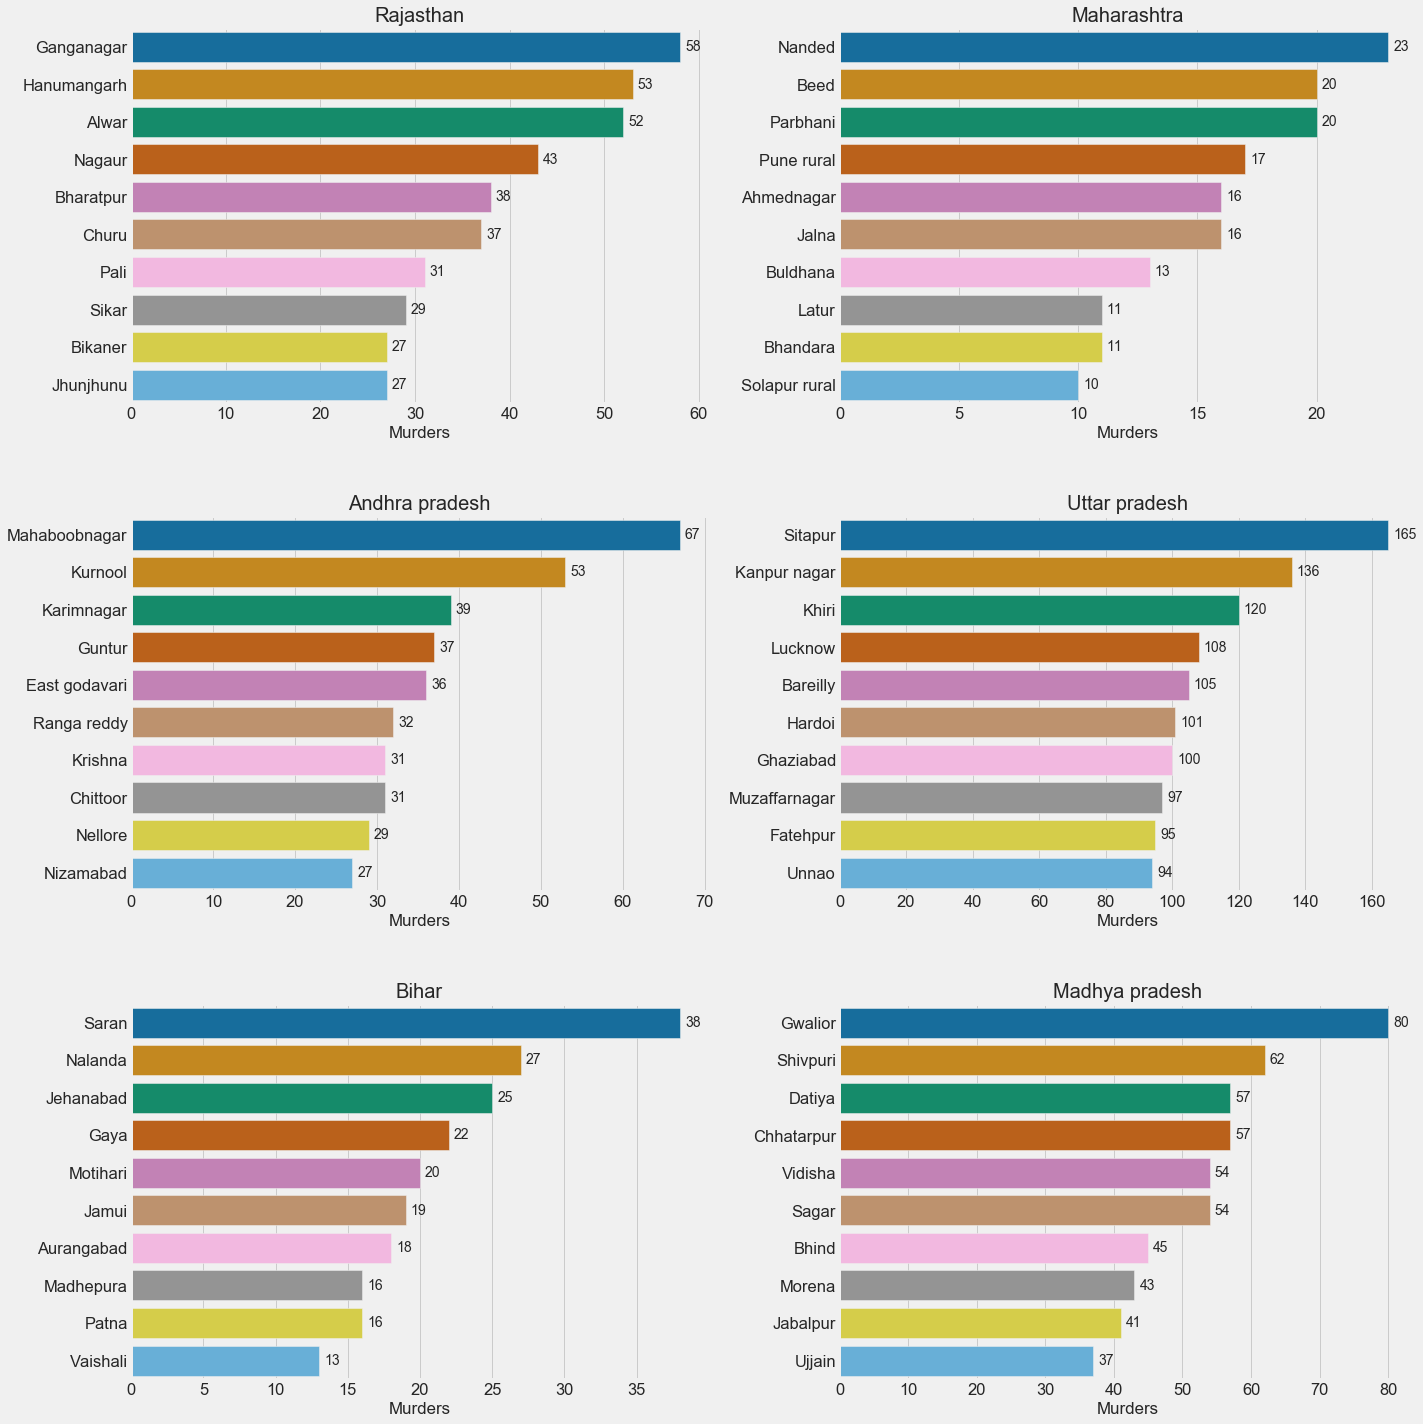

In [18]:
 plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Murder', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Murder' ,y= 'DISTRICT',palette = 'colorblind' )
    plt.xlabel('Murders')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Hurt Crime distribution State and District wise

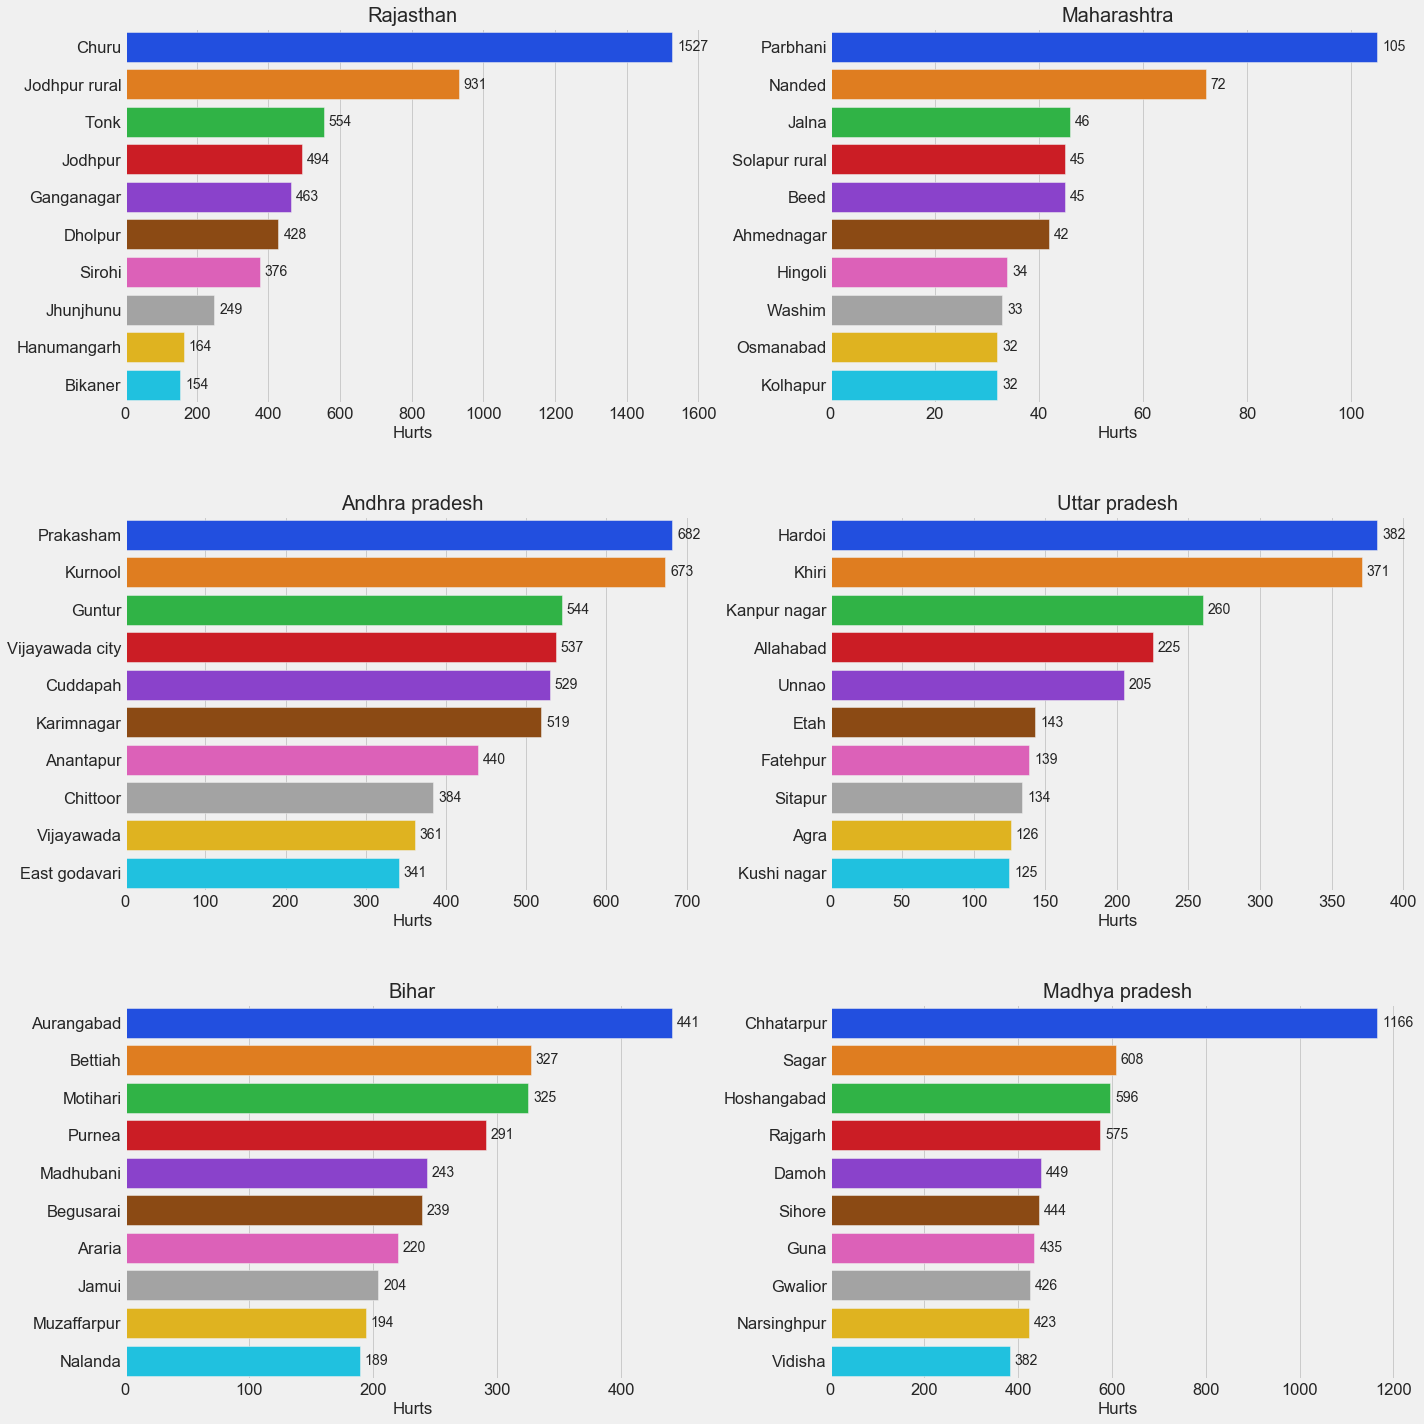

In [19]:
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Hurt', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Hurt' ,y= 'DISTRICT', palette = 'bright')
    plt.xlabel('Hurts')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Crimes registered under Prevention of atrocities (POA) Act distribution State and District wise

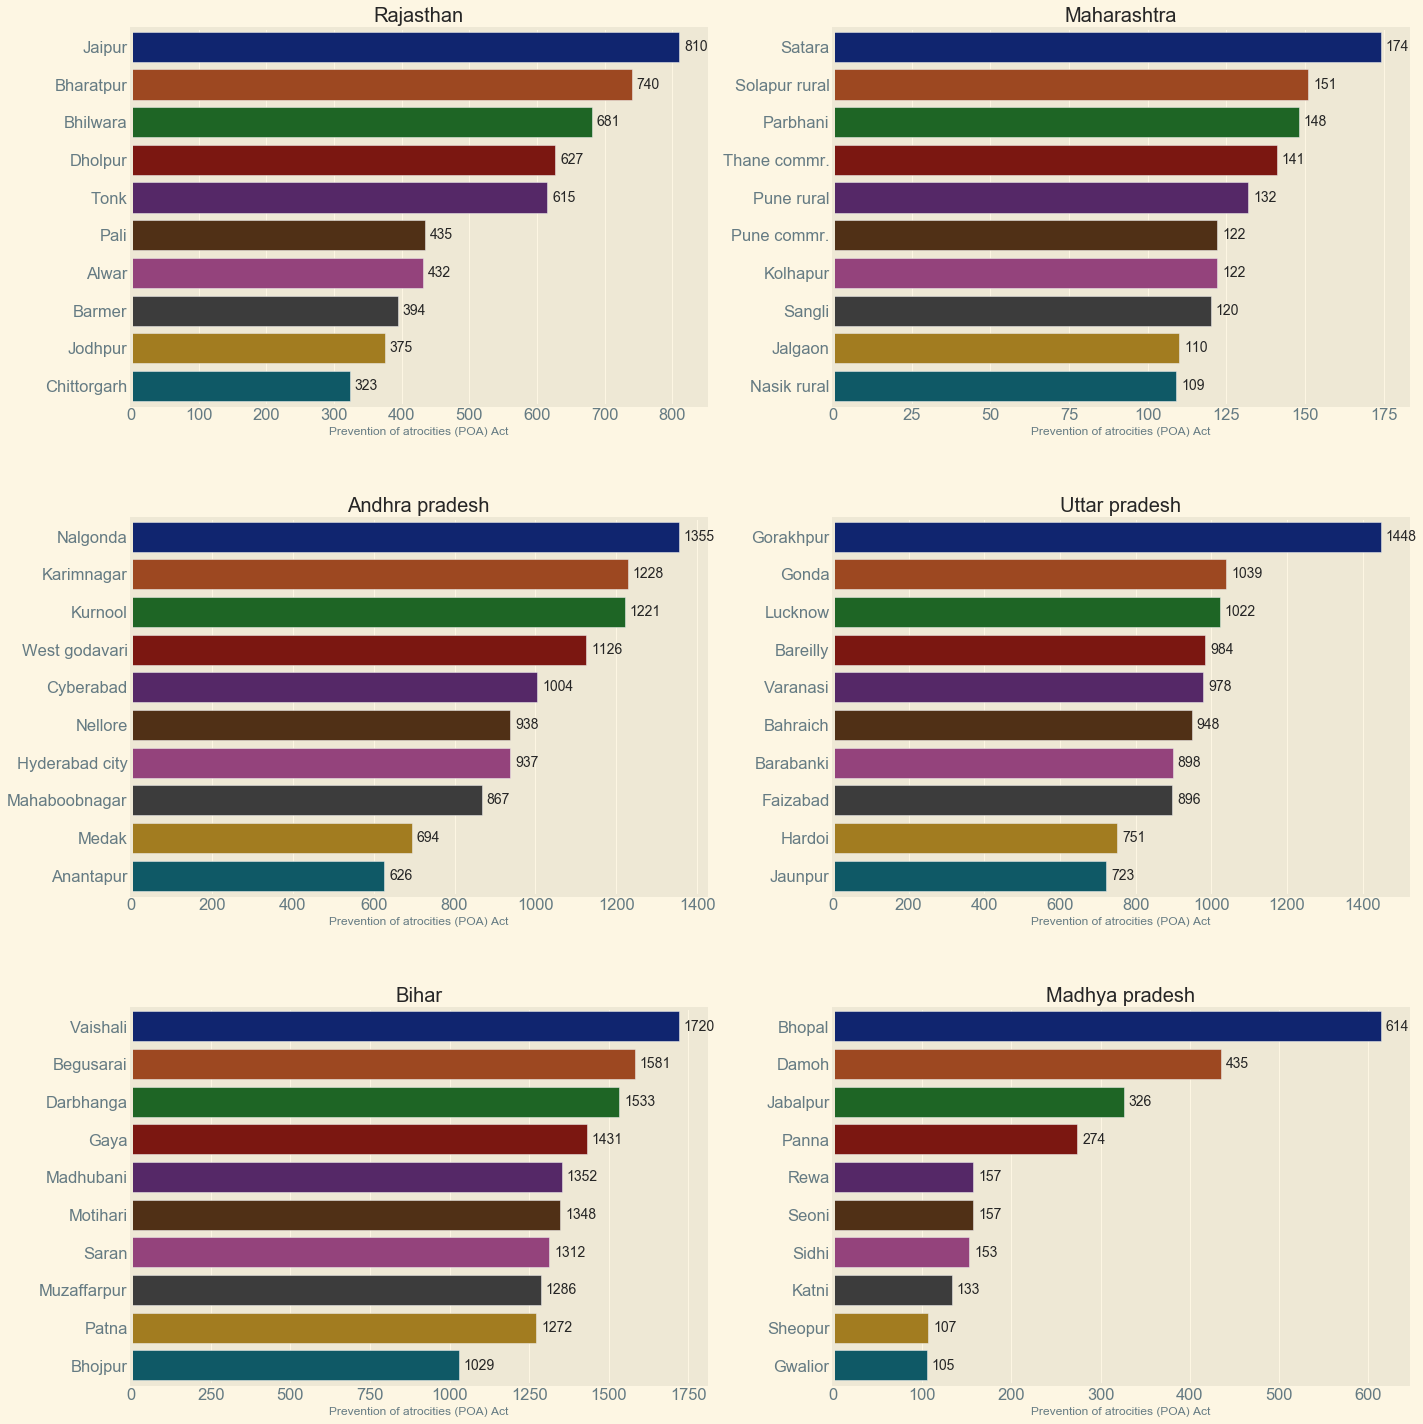

In [20]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,20))
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Prevention of atrocities (POA) Act', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Prevention of atrocities (POA) Act' ,y= 'DISTRICT', palette = 'dark' )
    plt.xlabel('Prevention of atrocities (POA) Act')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Other crimes distribution State and District wise

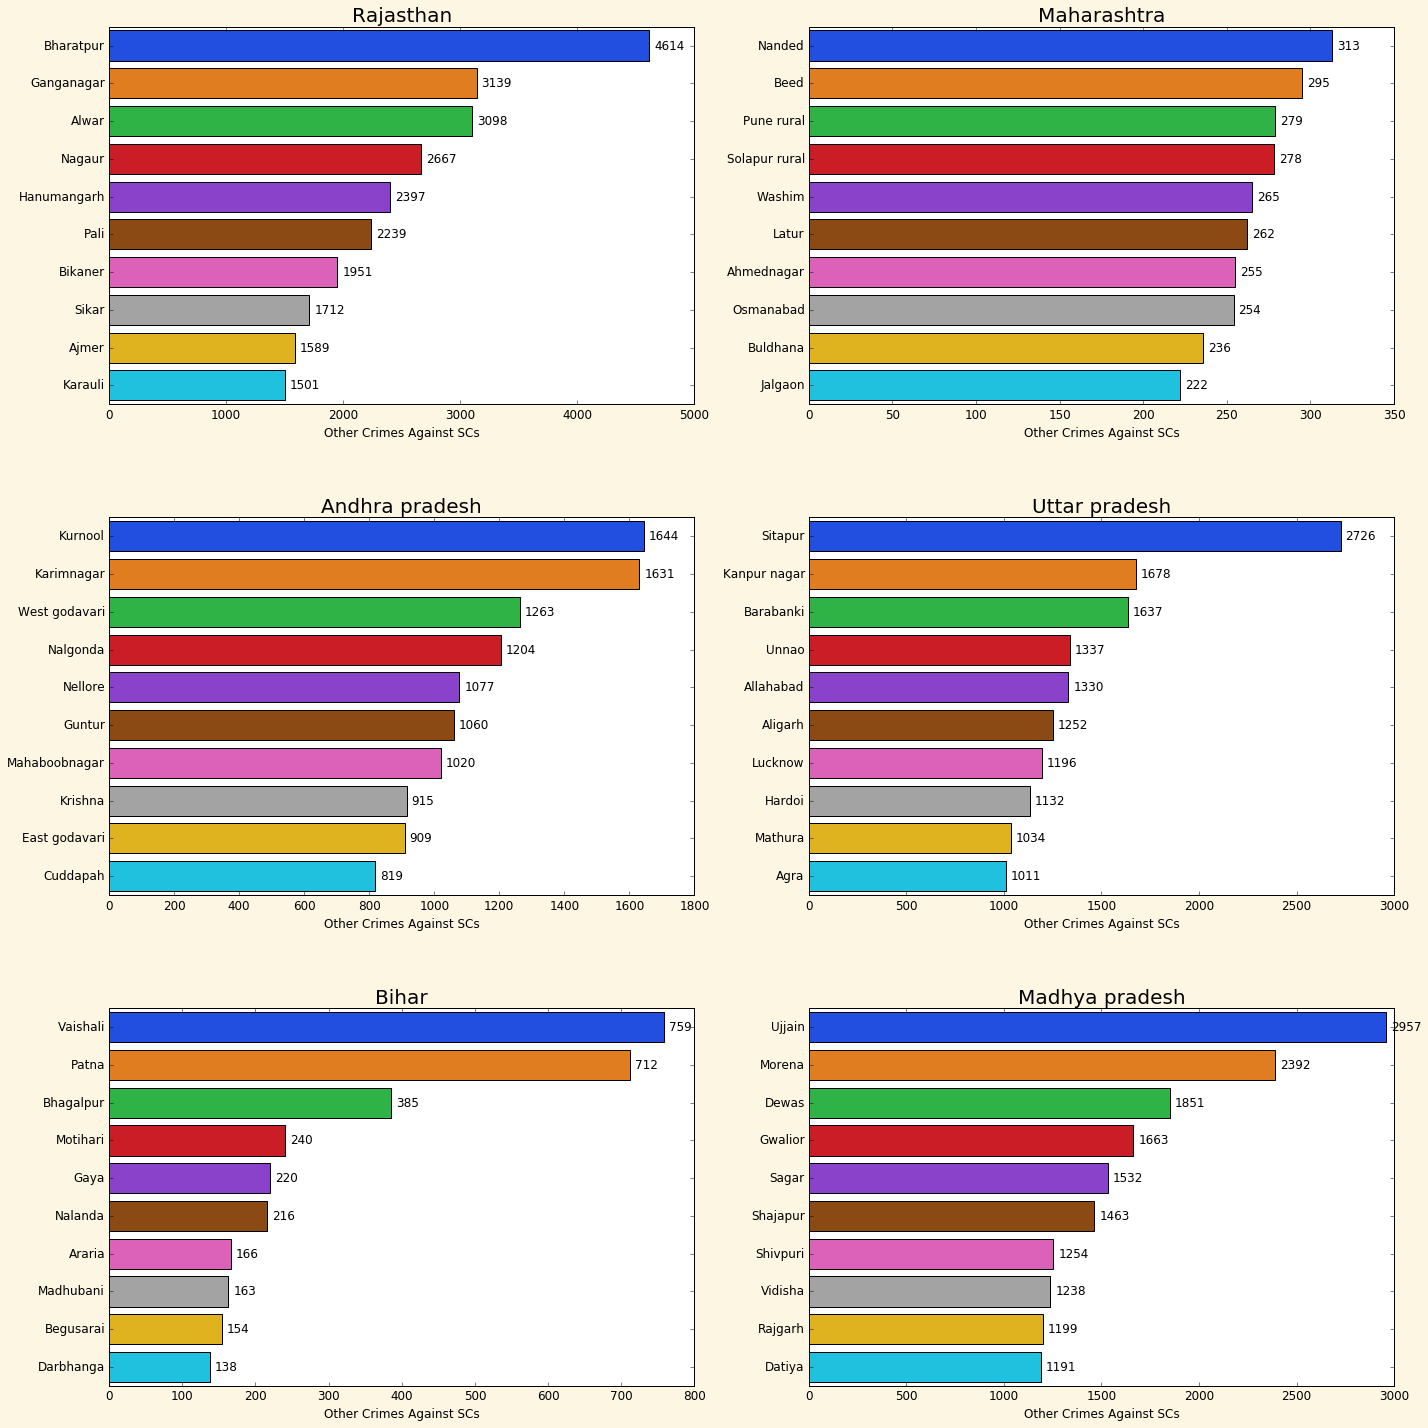

In [21]:
plt.figure(figsize=(20,20))
plt.style.use('classic')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Other Crimes Against SCs', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Other Crimes Against SCs' ,y= 'DISTRICT', palette = 'bright' )
    plt.xlabel('Other Crimes Against SCs')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# Crimes against ST

In [22]:
df_st = pd.concat([d3, d4])
df_st.shape

(9841, 13)

Following the same data cleaning process as done above for df_sc

In [23]:
df_st.describe(include=['O'])

STATE/UT DISTRICT
count            9841     9841
unique             70      833
top     UTTAR PRADESH    TOTAL
freq              878      421

In [24]:
df_st['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [25]:
df_st['STATE/UT'] = df_st['STATE/UT'].str.capitalize()
df_st['DISTRICT'] = df_st['DISTRICT'].str.capitalize()

df_st['STATE/UT'].unique()

array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A & n islands', 'Chandigarh', 'D & n haveli',
       'Daman & diu', 'Delhi', 'Lakshadweep', 'Puducherry', 'A&n islands',
       'D&n haveli', 'Delhi ut'], dtype=object)

In [26]:
df_st.describe(include=['O'])

STATE/UT DISTRICT
count            9841     9841
unique             38      833
top     Uttar pradesh    Total
freq              955      421

In [27]:
df_st['STATE/UT']=df_st['STATE/UT'].replace('D & n haveli','D&n haveli')
df_st['STATE/UT']=df_st['STATE/UT'].replace('A & n islands','A&n islands')
df_st['STATE/UT']=df_st['STATE/UT'].replace('Delhi','Delhi ut')

df_st['STATE/UT'].unique()

array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A&n islands', 'Chandigarh', 'D&n haveli',
       'Daman & diu', 'Delhi ut', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [28]:
df_st.describe(include=['O'])

STATE/UT DISTRICT
count            9841     9841
unique             35      833
top     Uttar pradesh    Total
freq              955      421

In [29]:
df_st['DISTRICT'].unique()

array(['Adilabad', 'Anantapur', 'Chittoor', 'Cuddapah', 'East godavari',
       'Guntakal rly.', 'Guntur', 'Hyderabad city', 'Karimnagar',
       'Khammam', 'Krishna', 'Kurnool', 'Mahaboobnagar', 'Medak',
       'Nalgonda', 'Nellore', 'Nizamabad', 'Prakasham', 'Ranga reddy',
       'Secunderabad rly.', 'Srikakulam', 'Vijayawada', 'Vijayawada rly.',
       'Visakha rural', 'Visakhapatnam', 'Vizianagaram', 'Warangal',
       'West godavari', 'Total', 'Changlang', 'Dibang valley',
       'Kameng east', 'Kameng west', 'Lohit', 'Papum pare', 'Siang east',
       'Siang upper', 'Siang west', 'Subansiri lower', 'Subansiri upper',
       'Tawang', 'Tirap', 'Barpeta', 'Bongaigaon', 'C.i.d.', 'Cachar',
       'Darrang', 'Dhemaji', 'Dhubri', 'Dibrugarh', 'G.r.p.', 'Goalpara',
       'Golaghat', 'Guwahati city', 'Hailakandi', 'Jorhat', 'Kamrup',
       'Karbi anglong', 'Karimganj', 'Kokrajhar', 'Lakhimpur', 'Morigaon',
       'N.c. hills', 'Nagaon', 'Nalbari', 'R.p.o.', 'Sibsagar',
       'Sonitpu

In [30]:
df_st['DISTRICT']=df_st['DISTRICT'].replace('Zz total','Total')

# Exploratory Data Analysis

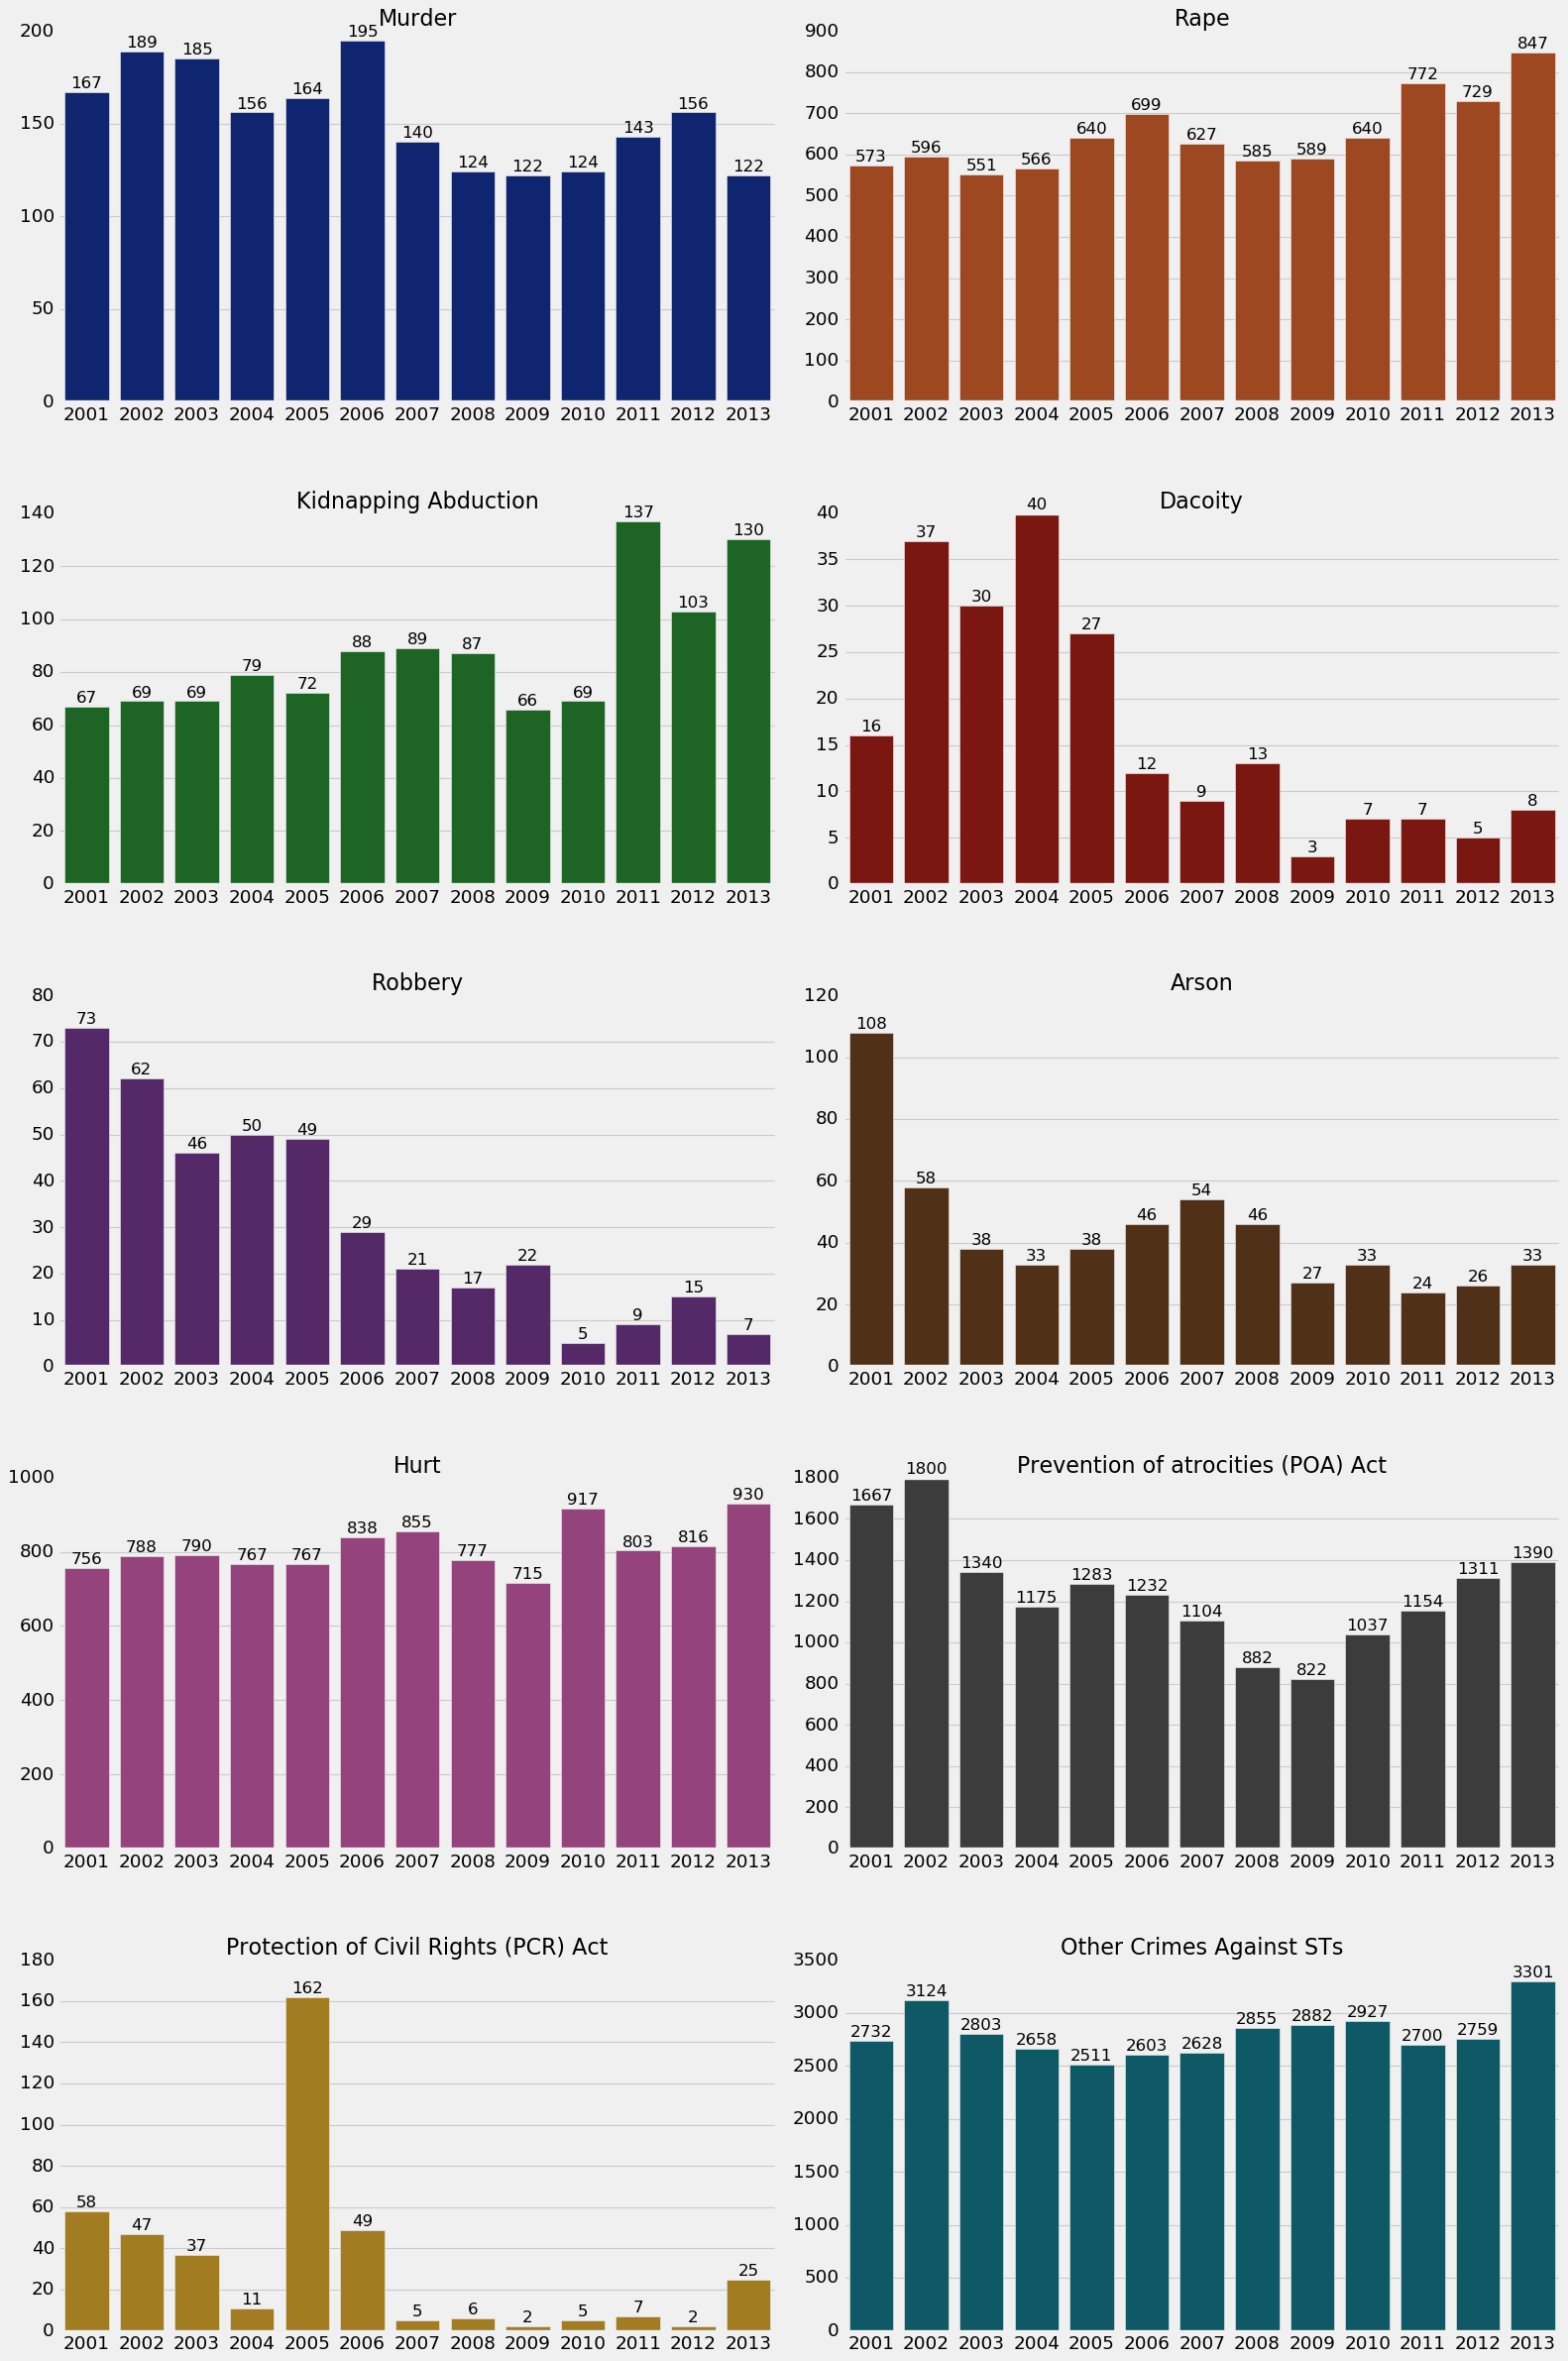

In [31]:
st_crime = df_st[df_st.DISTRICT == 'Total']
st_crime = st_crime.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against STs'].sum().reset_index()

#Plotting Graphs
import itertools
sns.set_context("talk")
plt.style.use("fivethirtyeight")
palette = itertools.cycle(sns.color_palette("dark"))
columns = ['Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against STs']
plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')
for i,column in enumerate(columns):
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= st_crime,x='Year',y= column ,color=next(palette) )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Looking at the above graphs we can correctly draw some inferences:

- Murdur crimes against schedule tribes seem to be experiencing a fall.
- Rape crimes against schedule tribes seems to be constant throughut the span of 12 years.
- Kidnapping and Abduction crimes against schedule tribes were low and constant for a long time, but recent years have expereienced a vast increase.
- Robbery crimes against schedule tribes have decreased with time to very low.
- Arson crimes against schedule tribes have decreased with time.
- Hurt crimes against schedule tribes remain constant through the span of 12 years, without experiencing an fall.
- Other crimes against schedule cast are at a rise

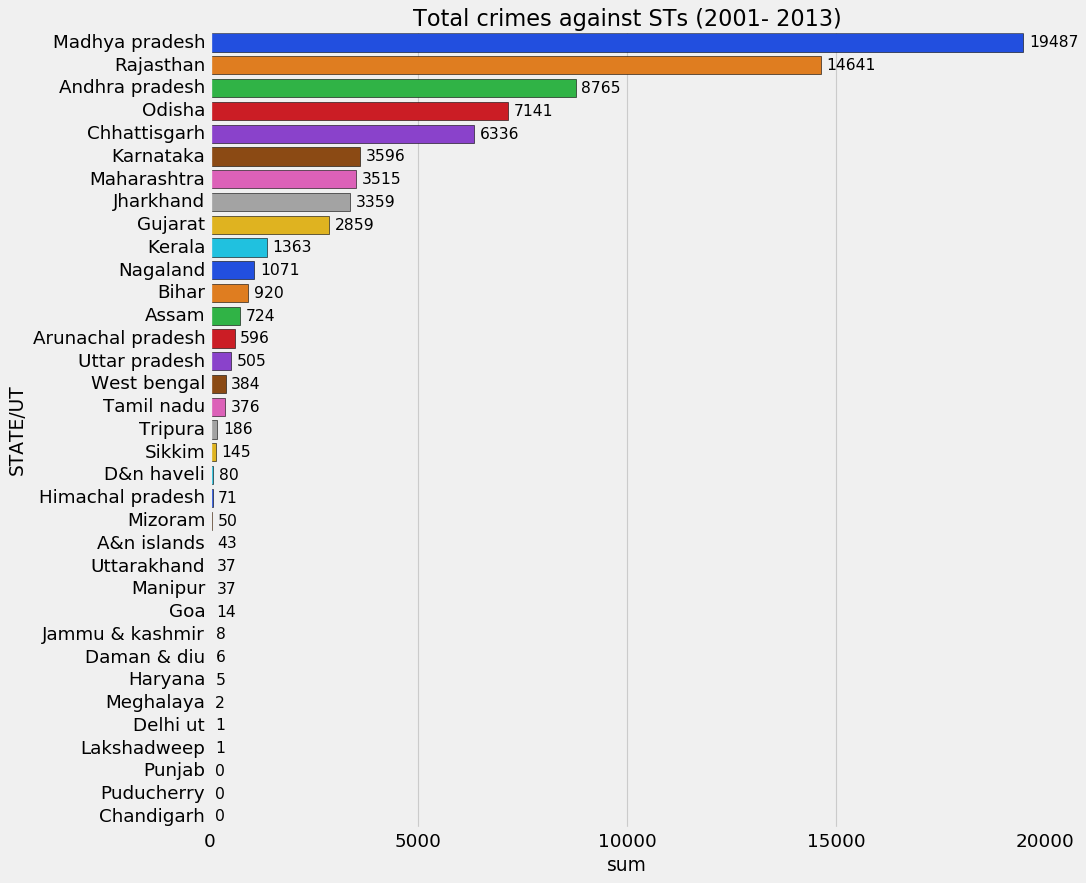

In [32]:
stateyear = df_st[df_st.DISTRICT == 'Total']
stateyear = stateyear.groupby(['Year','STATE/UT'])['Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against STs'].sum().reset_index()
stateyear['sum'] =  stateyear.iloc[:, 2:].sum(axis=1)
stateyear2 = stateyear.groupby('STATE/UT')['sum'].sum().reset_index()
stateyear2 = stateyear2.sort_values('sum', ascending = False)

plt.figure(figsize = (12,12))
sns.set_context("talk")
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'sum', y = 'STATE/UT', data = stateyear2, palette = 'bright', edgecolor = 'black')
plt.title('Total crimes against STs (2001- 2013)')
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### Looking at the above graph we can conclude that:

- The state of Madhya Pradesh experiences the maximum number of crimes against against the schedule tribe community (19,487).
- The state of Rajasthan experiences the second most crimes against against the schedule tribe community (14,641).
- The state of Andhra Pradesh experiences the third most crimes against against the schedule tribe community (8,765)

Rajasthan, Madhyapradesh, Andhrapradesh, Karnatka, Chhattisgarh, Odisha, Gujrat , Maharashtra, Jharkhand and Kerela has the more number of cases of crime against ST. Lets see the crimes in these states yearwise.

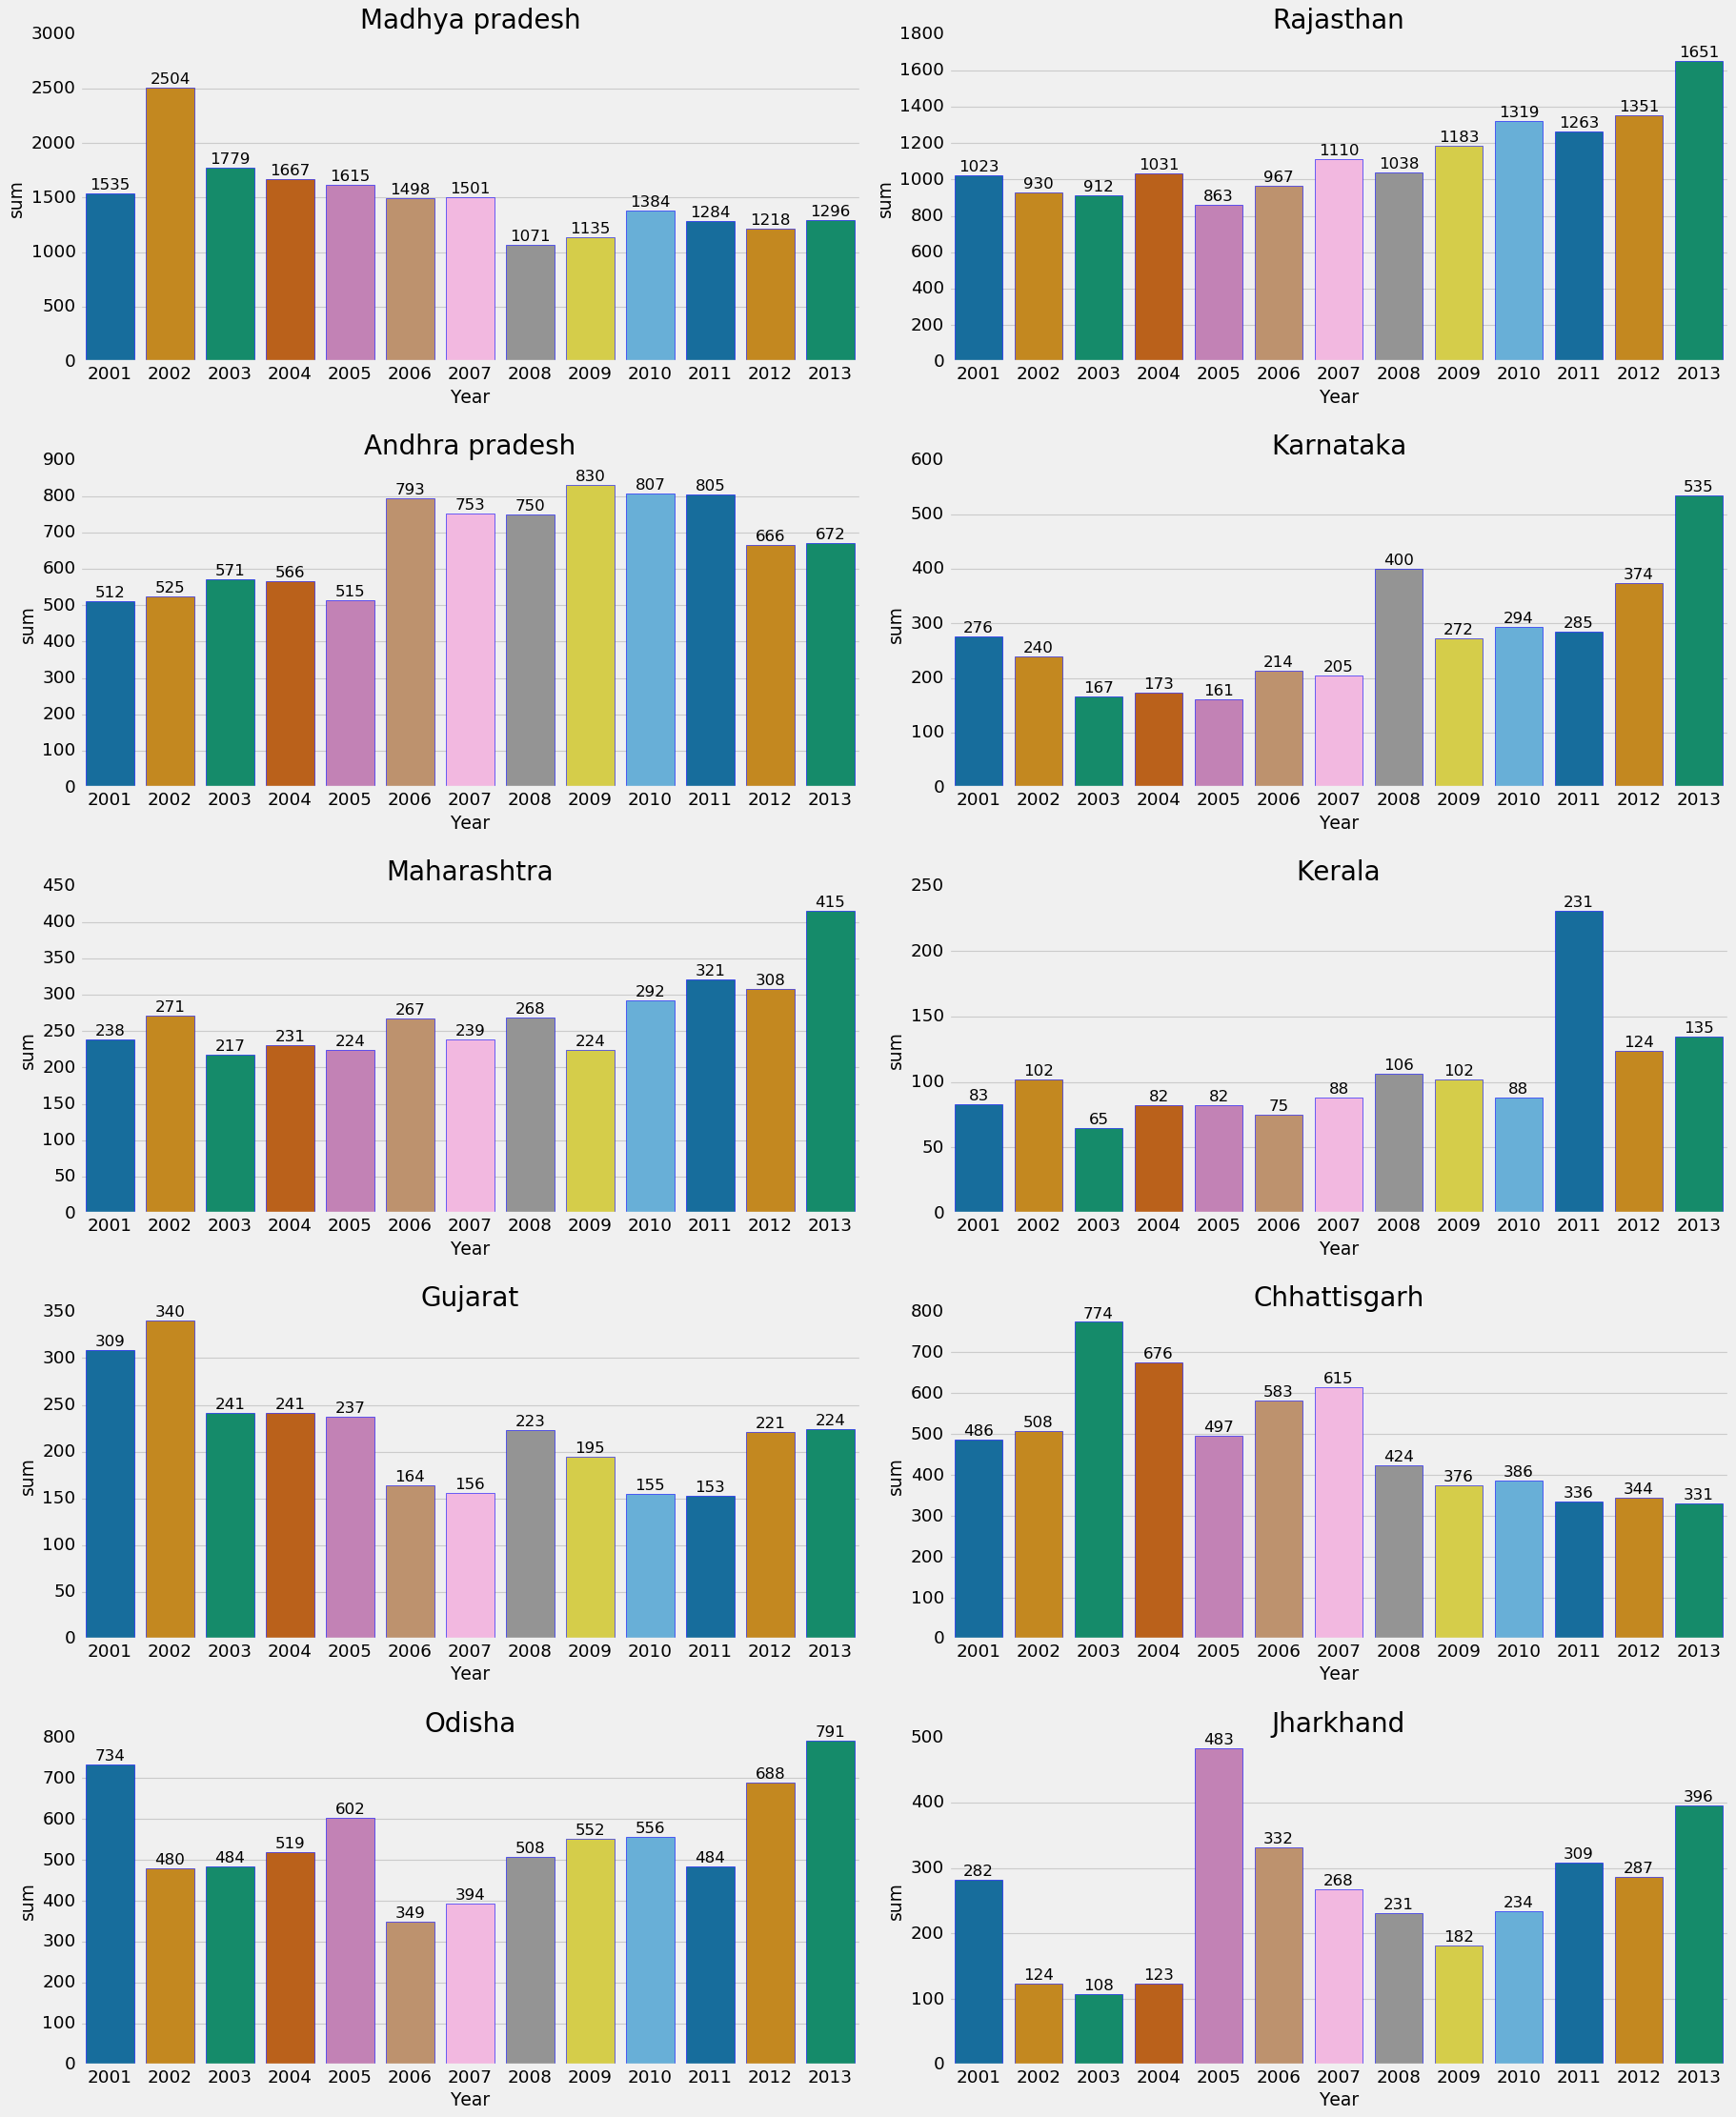

In [33]:
states = ['Madhya pradesh','Rajasthan', 'Andhra pradesh','Karnataka','Maharashtra','Kerala','Gujarat' ,'Chhattisgarh', 'Odisha', 'Jharkhand',]
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (23,28))

for i, s in enumerate(states):
    plt.subplot(5,2,i+1)
    stateyear3 = stateyear[stateyear['STATE/UT'] == s]
    ax = sns.barplot(x = 'Year' , y = 'sum' , data = stateyear3,ci=None , palette = 'colorblind' , edgecolor = 'blue')
    plt.title(s , size = 25)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
plt.tight_layout()
plt.subplots_adjust(hspace= .3)

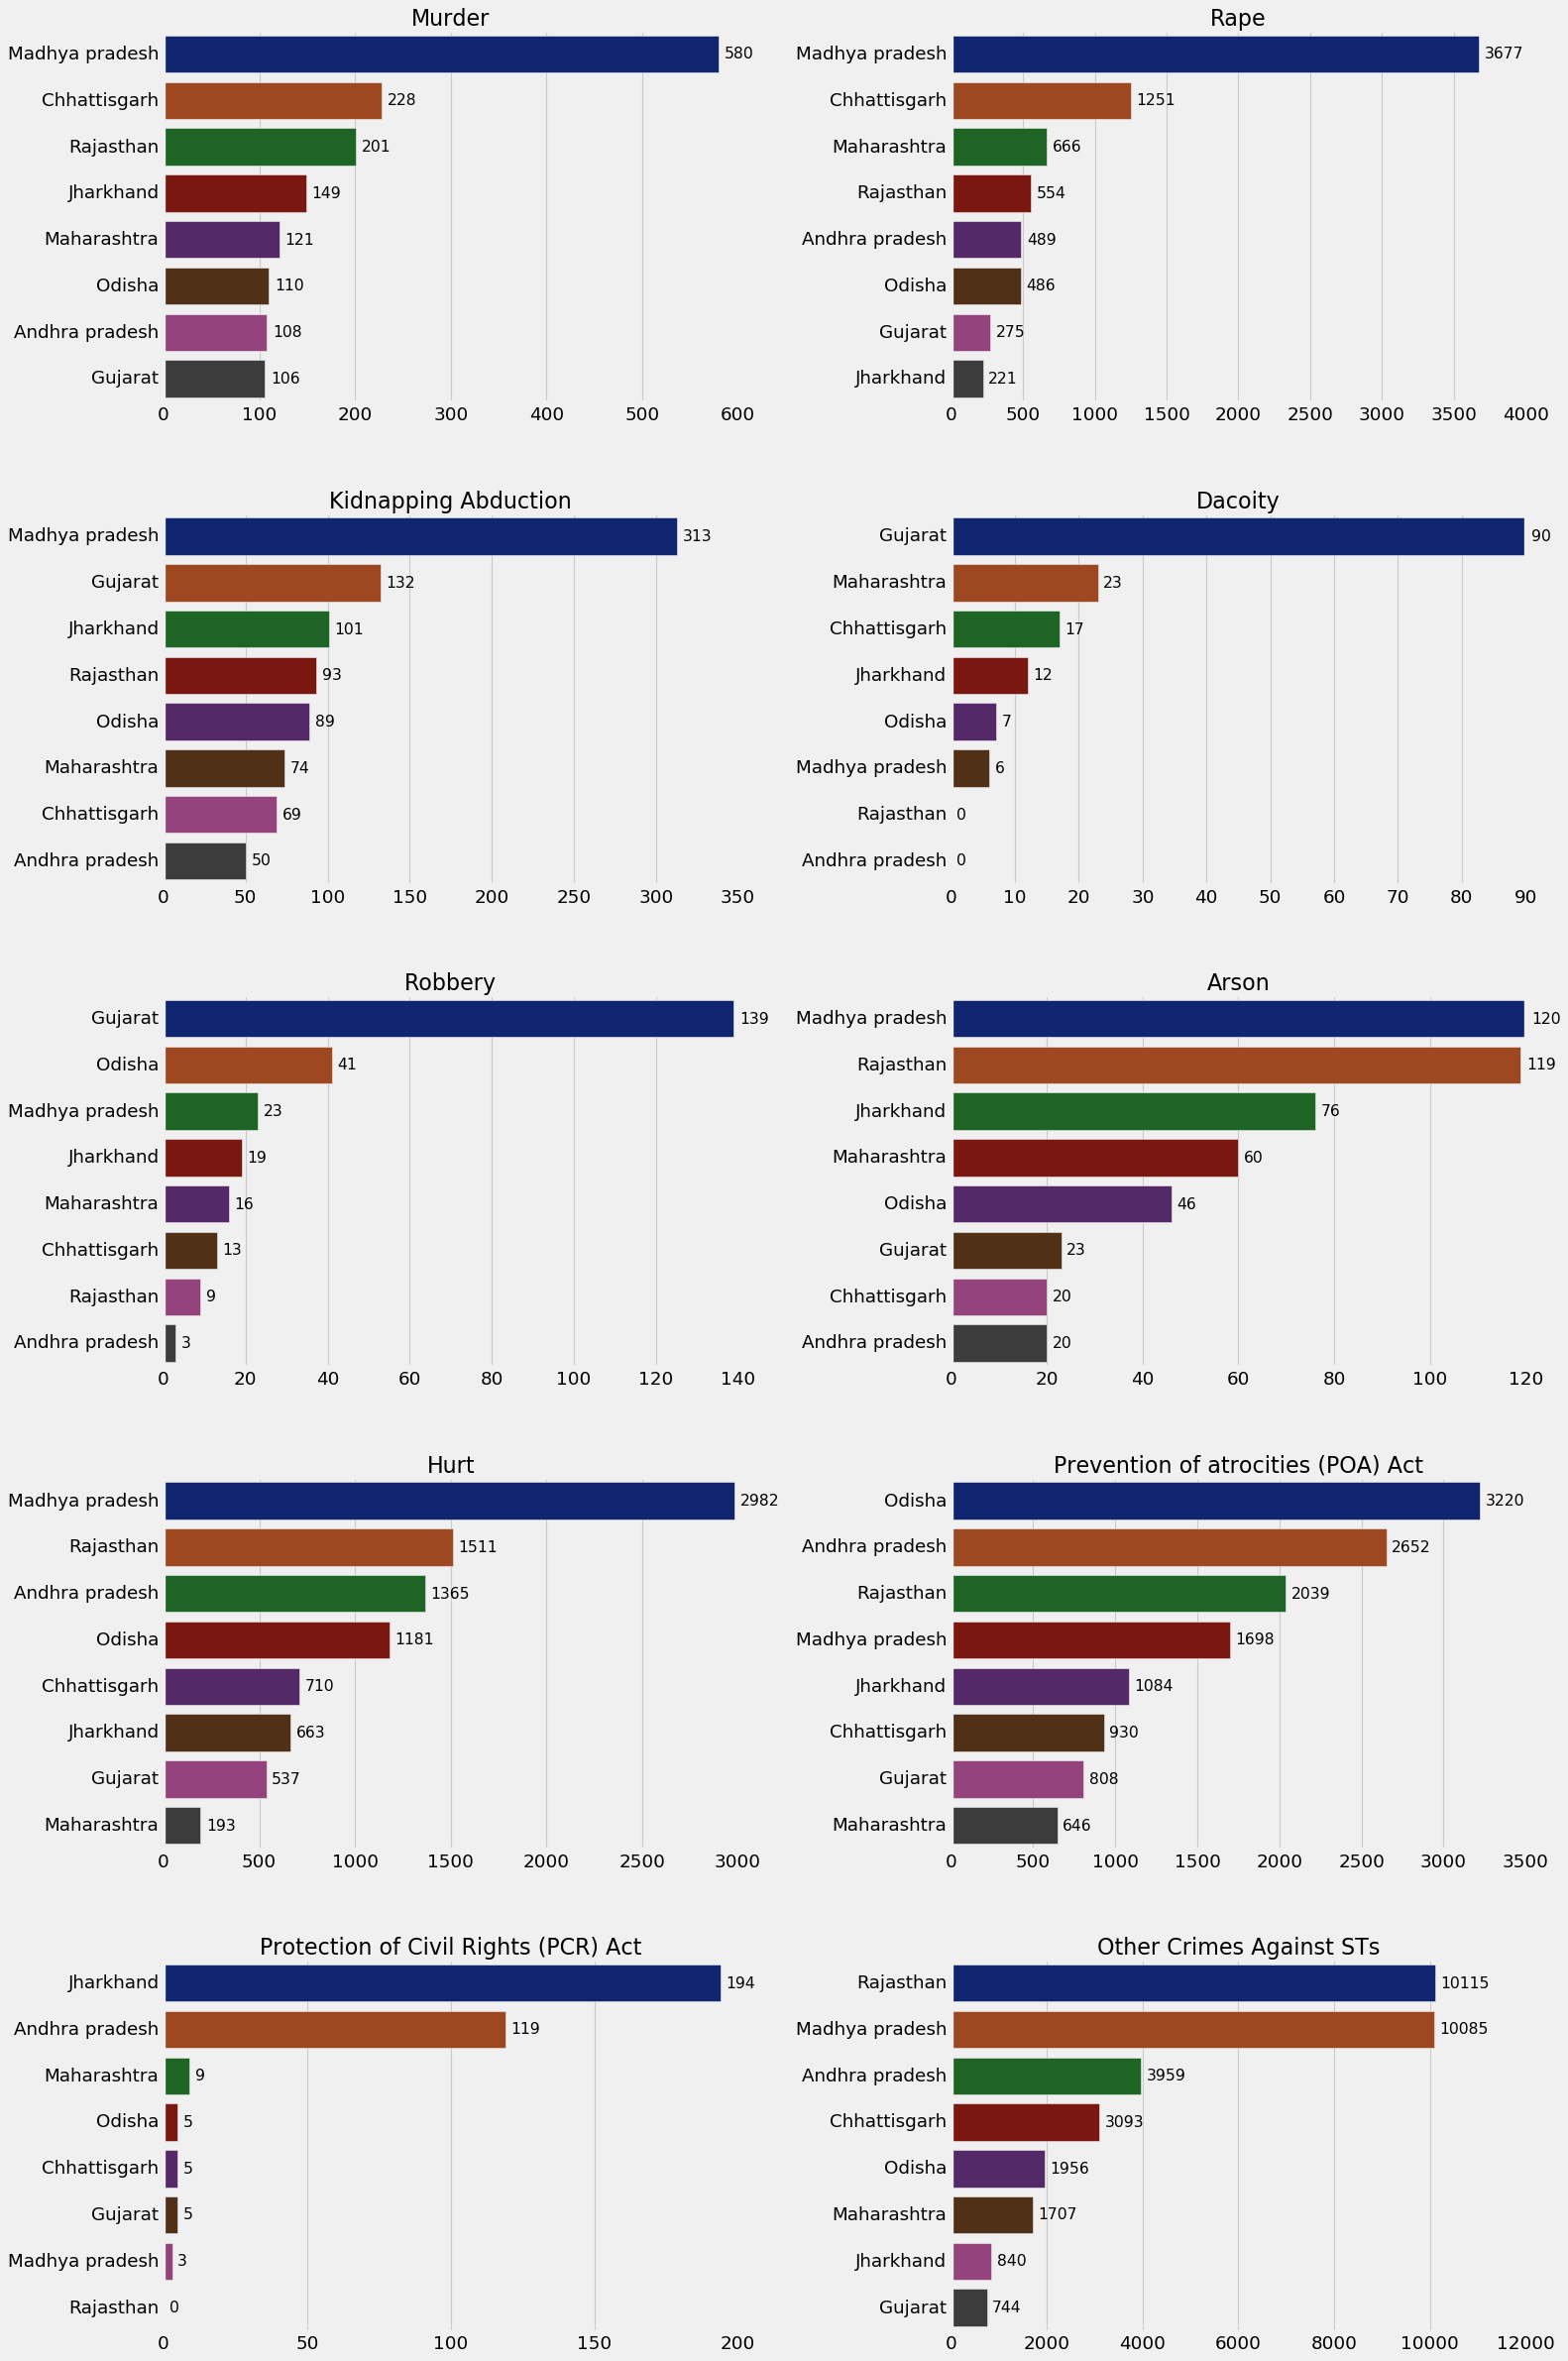

In [34]:
statecrime = df_st[df_st.DISTRICT == 'Total']
statecrime = statecrime.groupby(['STATE/UT'])['Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against STs'].sum().reset_index()

statecrime1 = statecrime[(statecrime.Murder > 100) & (statecrime.Rape > 100)]
sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    statecrime1 = statecrime1.sort_values(column,ascending = False)
    plt.subplot(5,2,i+1)
    ax = sns.barplot(data= statecrime1,x= column ,y='STATE/UT',palette = 'dark' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
   
    
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Looking at the above graphs we can conclude that:

#### Murder 
Following states experience the highest number of murders - 
- Uttar Pradesh
- Chattisgarh
- Rajasthan

#### Rape
Following states experience the highest number of rape - 
- Madhya Pradesh 
- Chattisgarh
- Maharashtra

#### Kidnapping and Abduction
Following states experience the highest number of Kidnappins - 
- Madhya Pradesh
- Gujrat
- Jharkhand

#### Dacoity
Following states experience the highest number of Dacoity - 
- Maharastra
- Gujrat
- Chattisgarh

#### Robbery
Following states experience the highest number of robbery - 
- Gujrat
- Odisha
- Madhya Pradesh

#### Arson
Following states experience the highest number of arson - 
- Madhya Pradesh
- Rajasthan
- Jharkhand

#### Hurt
Following states experience the highest number of hurt - 
- Madhya Pradesh
- Rajasthan
- Andra Pradesh

#### Prevention of Atrocities (POA) Act
Following states experience the highest number of crimes registered under POA - 
- Odisha
- Andhra Pradesh
- Rajasthan

#### Protection of Civil Rights (PCR) Act
Following states experience the highest number of crimes registered under PCR - 
- Jharkhand
- Andhra Pradesh
- Maharashtra

#### Other Crimes Against SCs
Following states experience the highest number of  - 
- Rajahthan
- Madhya Pradesh
- Andhra Pradesh

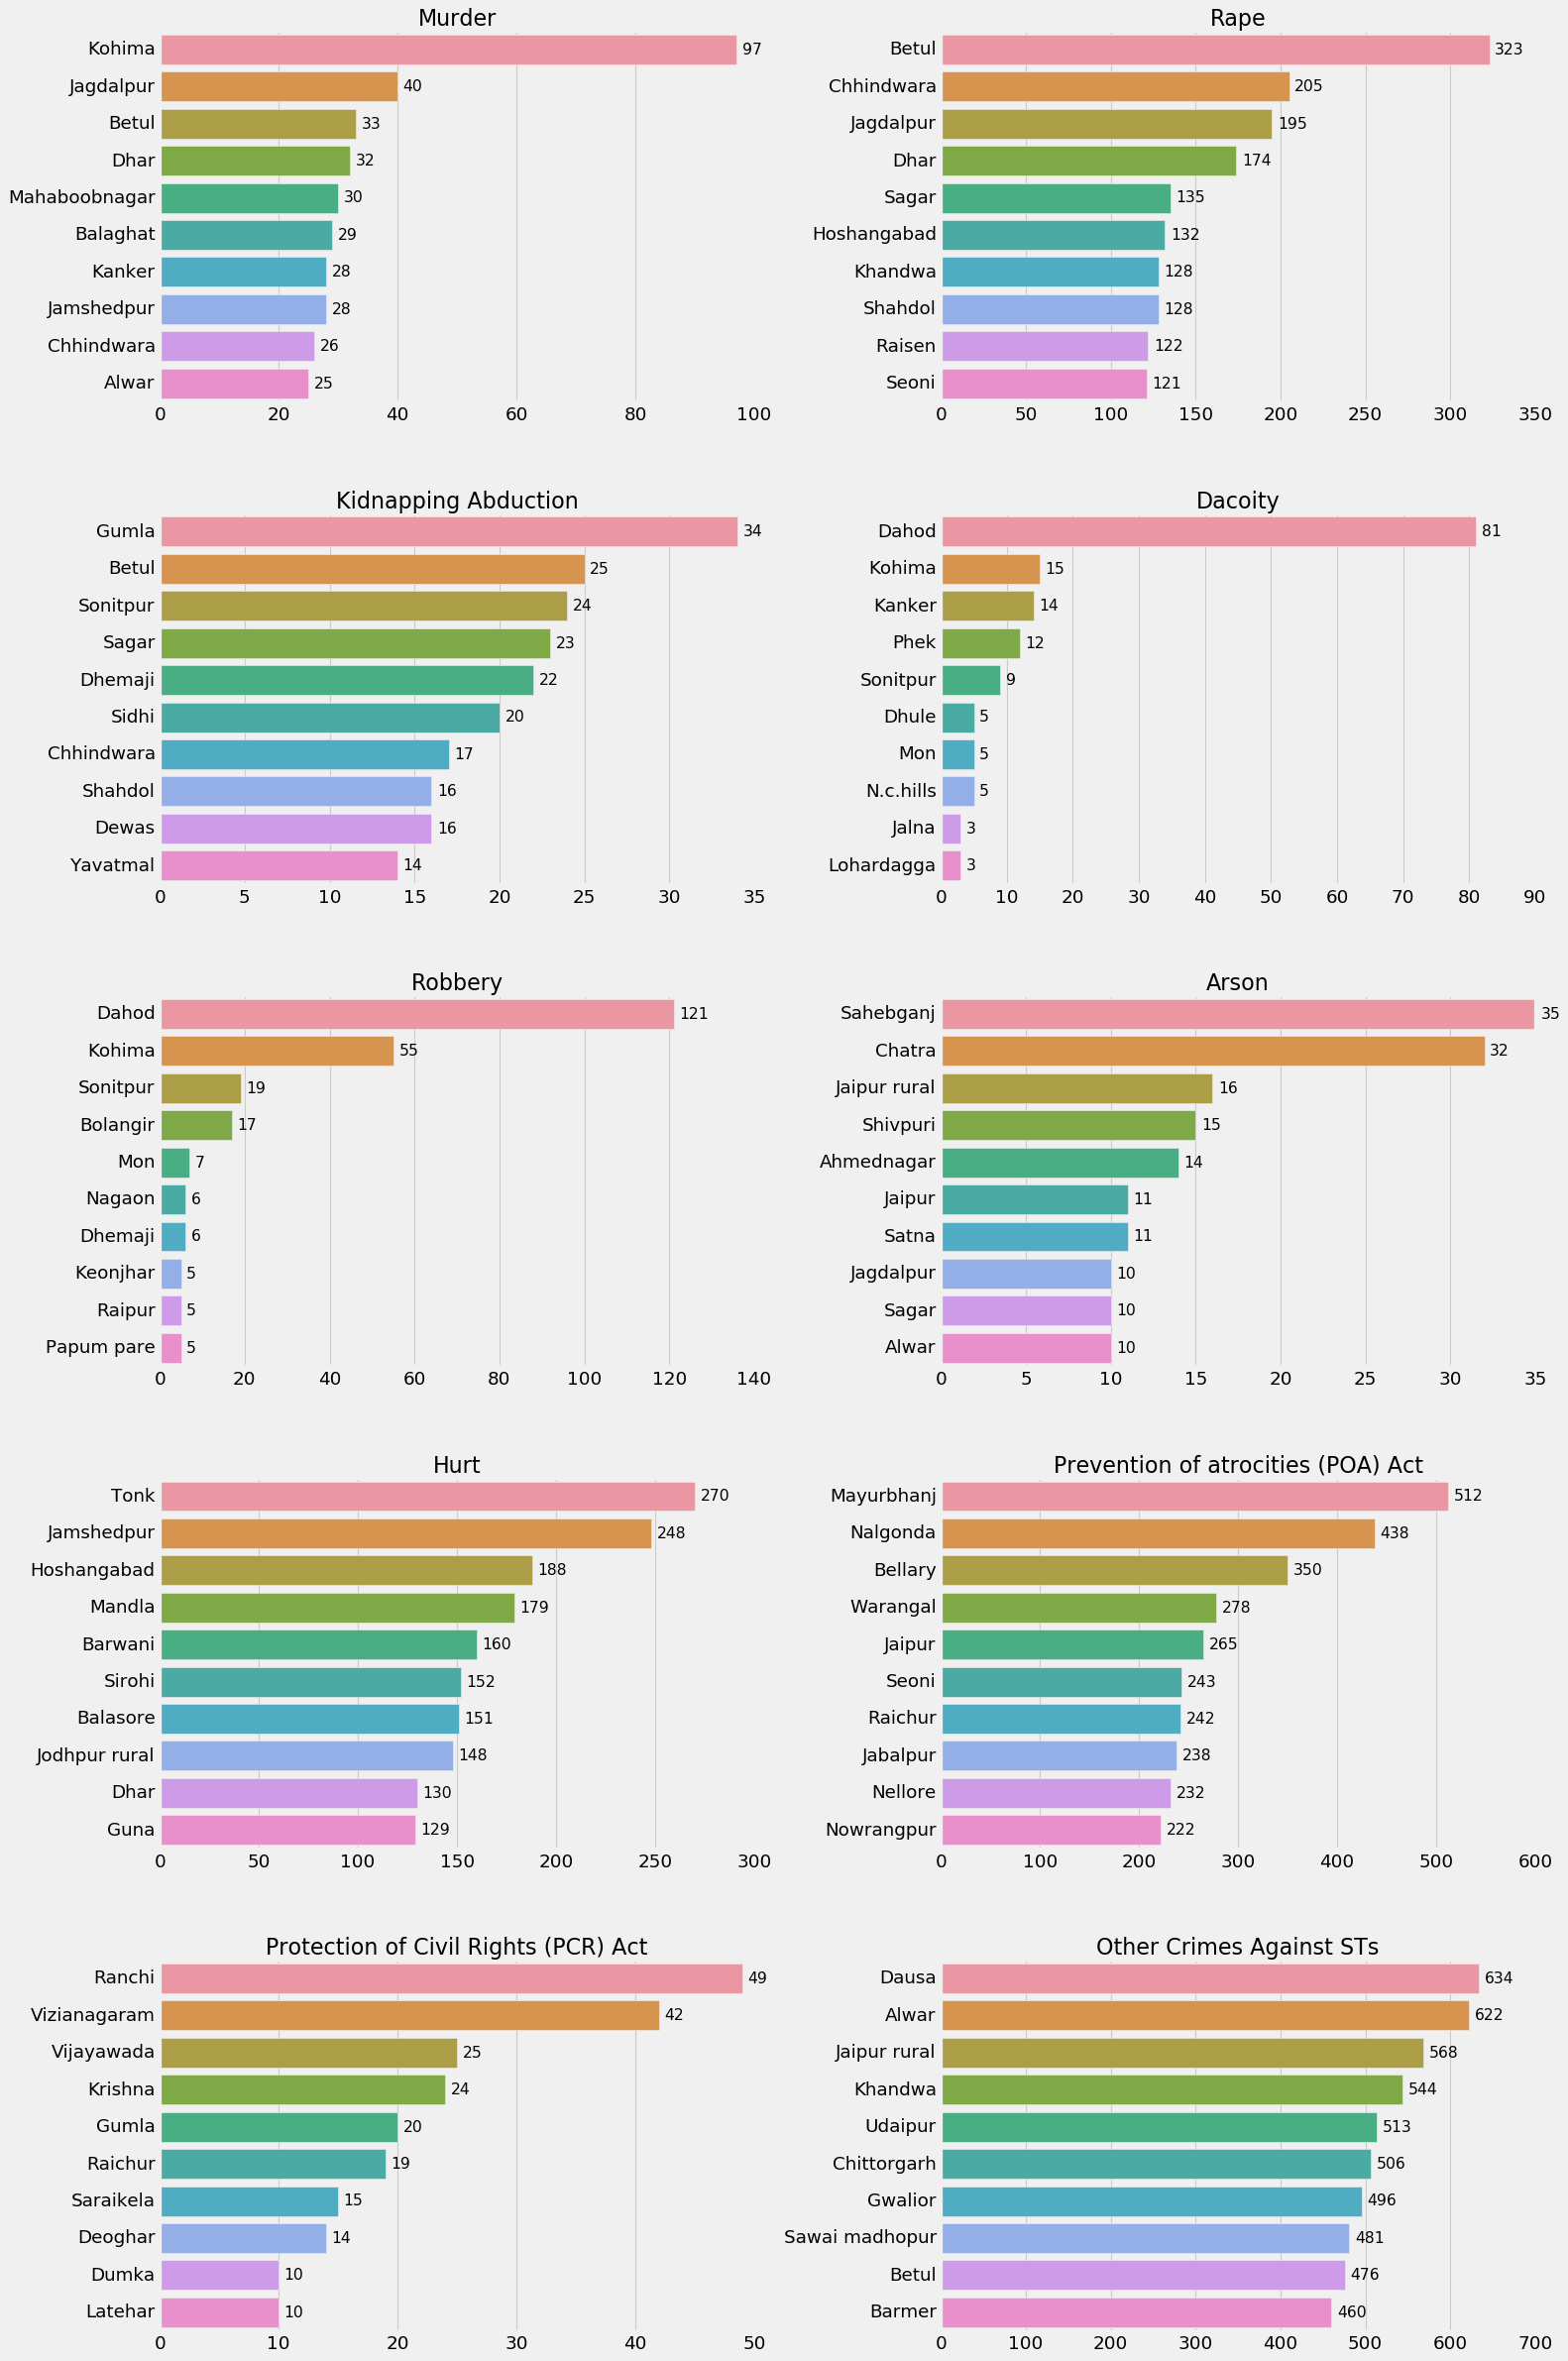

In [35]:
districtcrime = df_st[df_st.DISTRICT != 'Total']

districtcrime = districtcrime.groupby(['DISTRICT'])['Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against STs'].sum().reset_index()


sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    districtcrime1 = districtcrime.sort_values(column,ascending = False)
    districtcrime1 = districtcrime1.head(10)
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= districtcrime1,x= column ,y='DISTRICT' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Looking at the above graphs we can conclude that:

#### Murder 
Following district experience the highest number of murders - 
- Kohima

#### Rape
Following district experience the highest number of rape - 
- Betul 

#### Kidnapping and Abduction
Following district experience the highest number of Kidnappins - 
- Gumla

#### Dacoity
Following district experience the highest number of Dacoity - 
- Dahod

#### Robbery
Following district experience the highest number of robbery - 
-  Dahod

#### Arson
Following district experience the highest number of arson - 
- Sahebganj

#### Hurt
Following district experience the highest number of hurt - 
- Tonk

#### Prevention of Atrocities (POA) Act
Following district experience the highest number of POA crimes - 
- Mayurbhanj

#### Protection of Civil Rights (PCR) Act
Following district experience the highest number of PCR crimes - 
- Ranchi

#### Other Crimes Against SCs
Following district experience the highest number of  - 
- Duasa

### Rape crime distribution among States and Districts

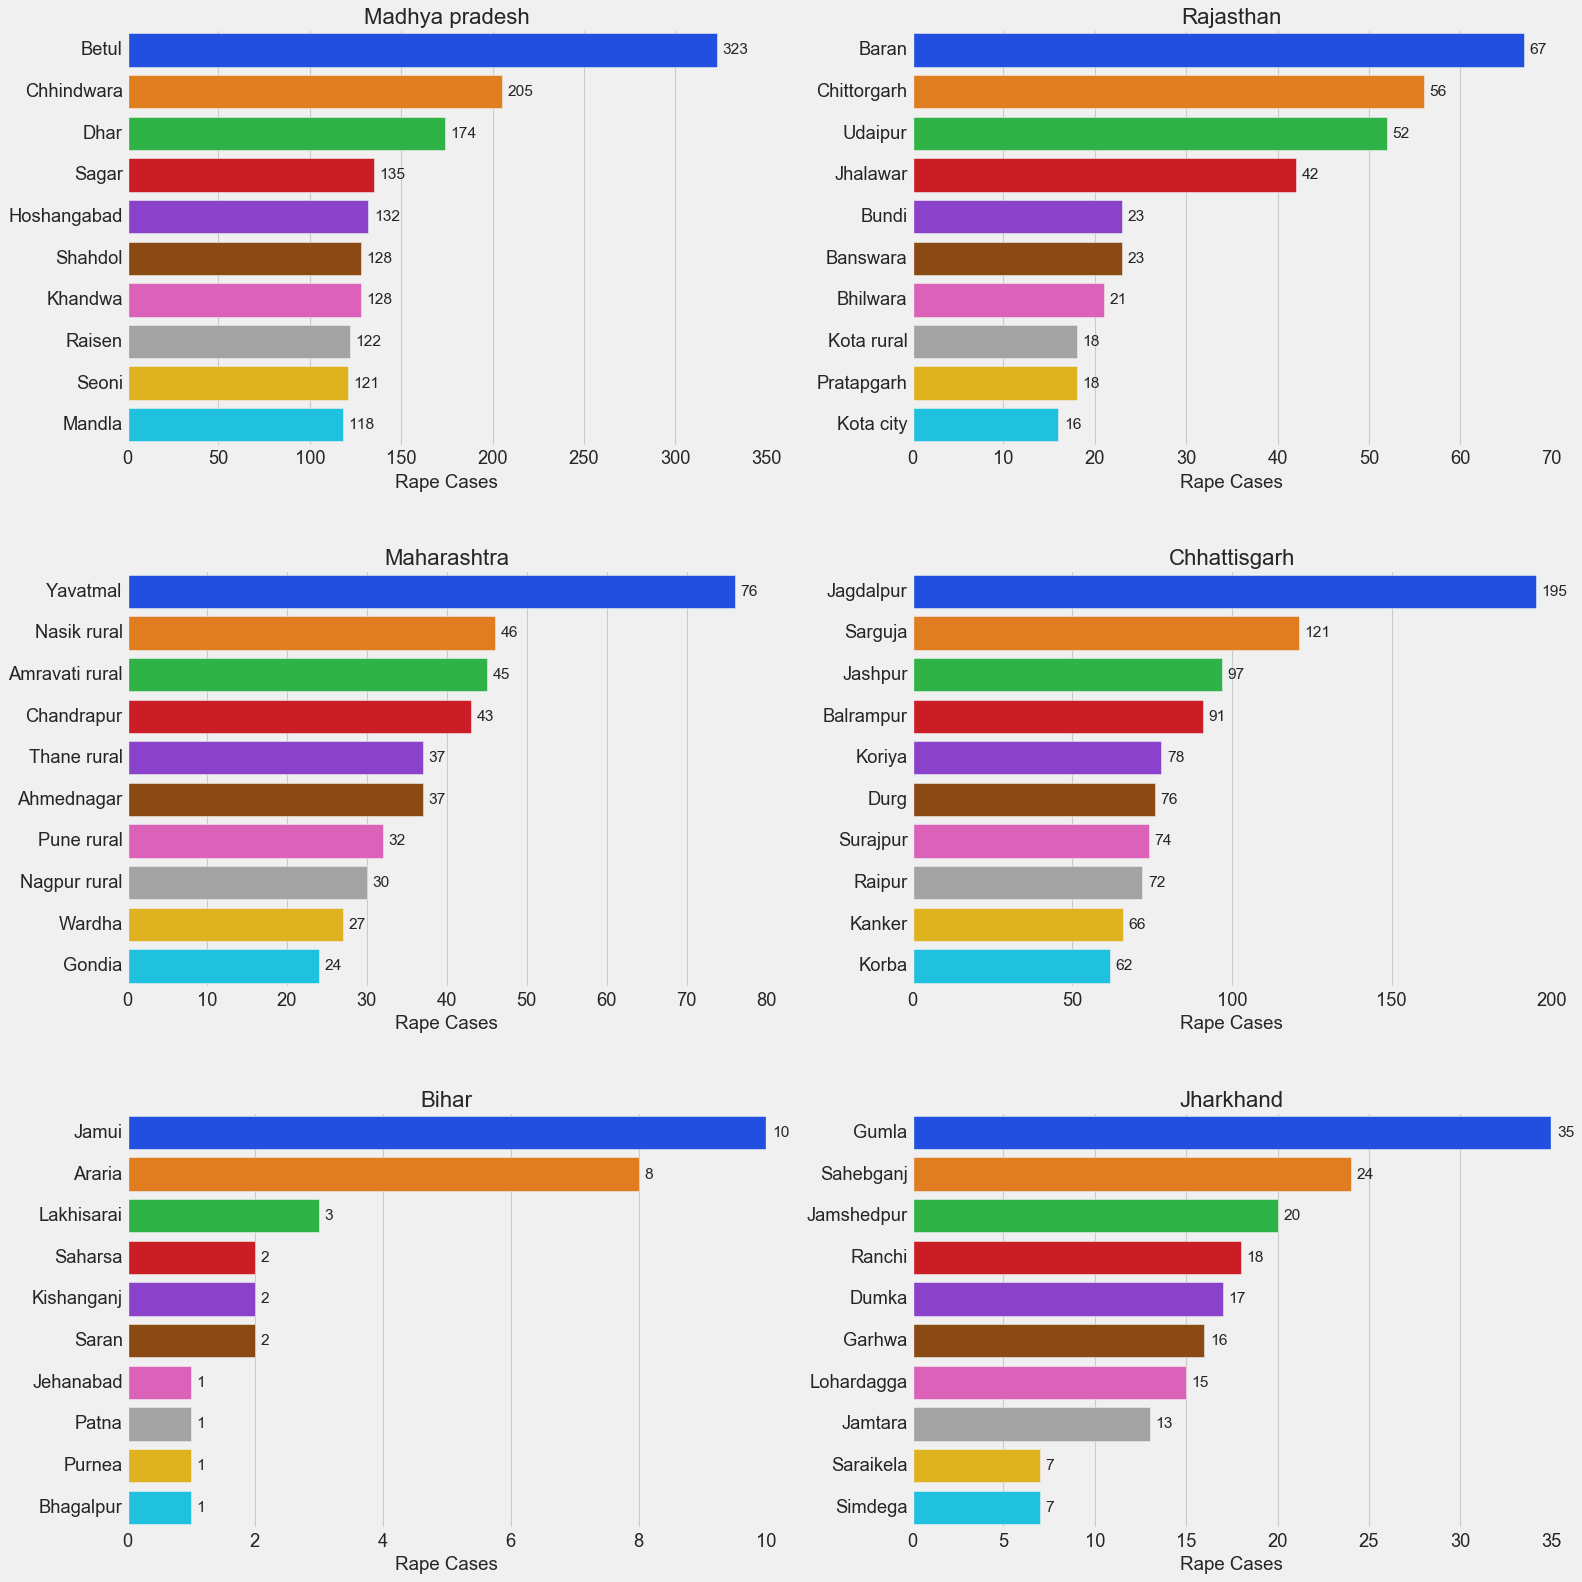

In [36]:
scsd = df_st[df_st.DISTRICT!= 'Total']
scsd = scsd.groupby(['STATE/UT', 'DISTRICT'])['Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'].sum().reset_index()


states = ['Madhya pradesh', 'Rajasthan', 'Maharashtra', 'Chhattisgarh', 'Bihar','Jharkhand']
sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Rape', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Rape' ,y= 'DISTRICT',palette = 'bright' )
    plt.xlabel('Rape Cases')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Murder crime distribution among States and Districts

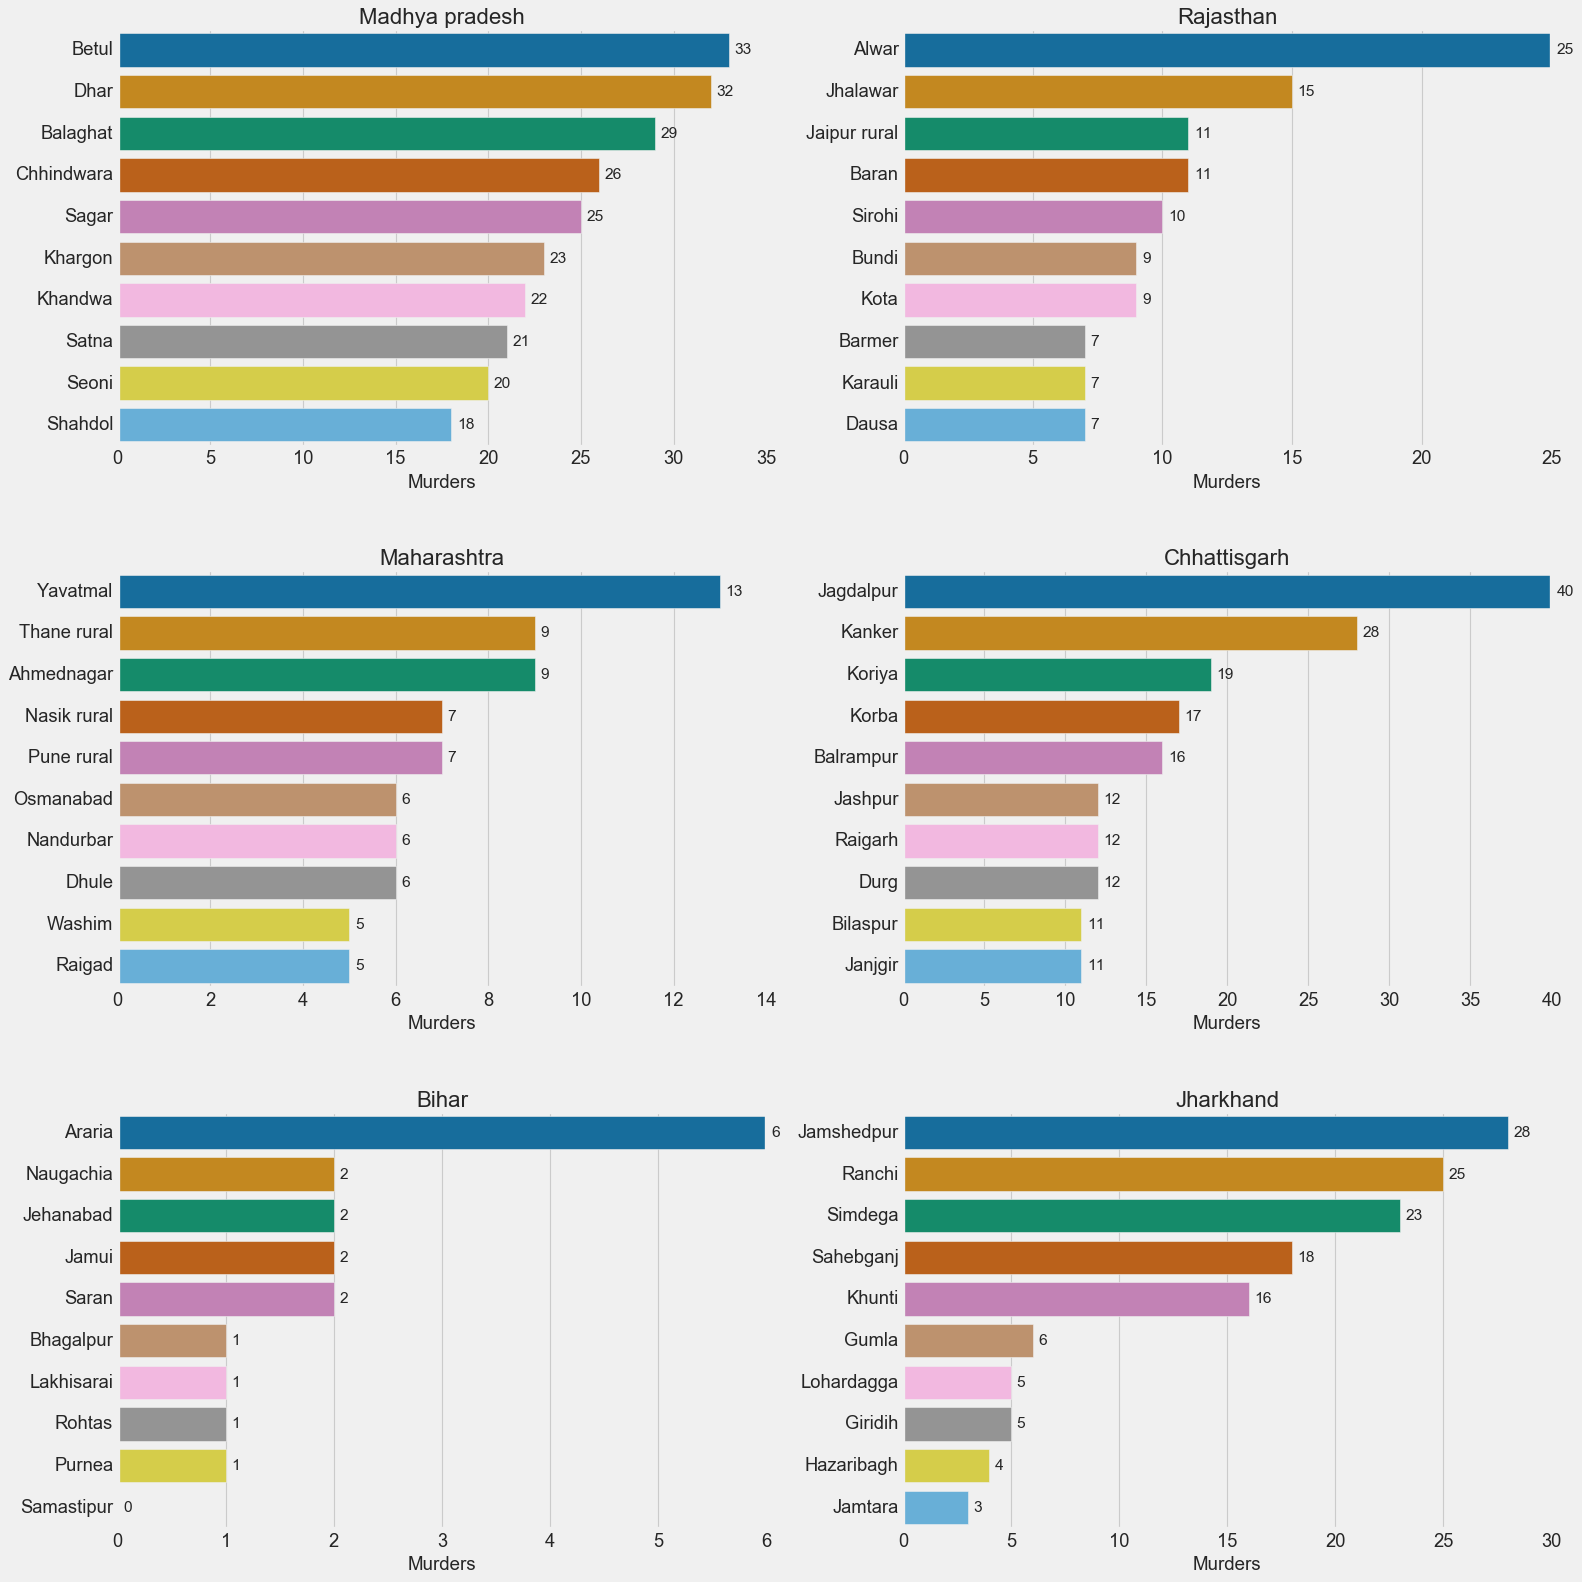

In [37]:
 plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Murder', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Murder' ,y= 'DISTRICT',palette = 'colorblind' )
    plt.xlabel('Murders')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Hurt crime distribution among States and Districts

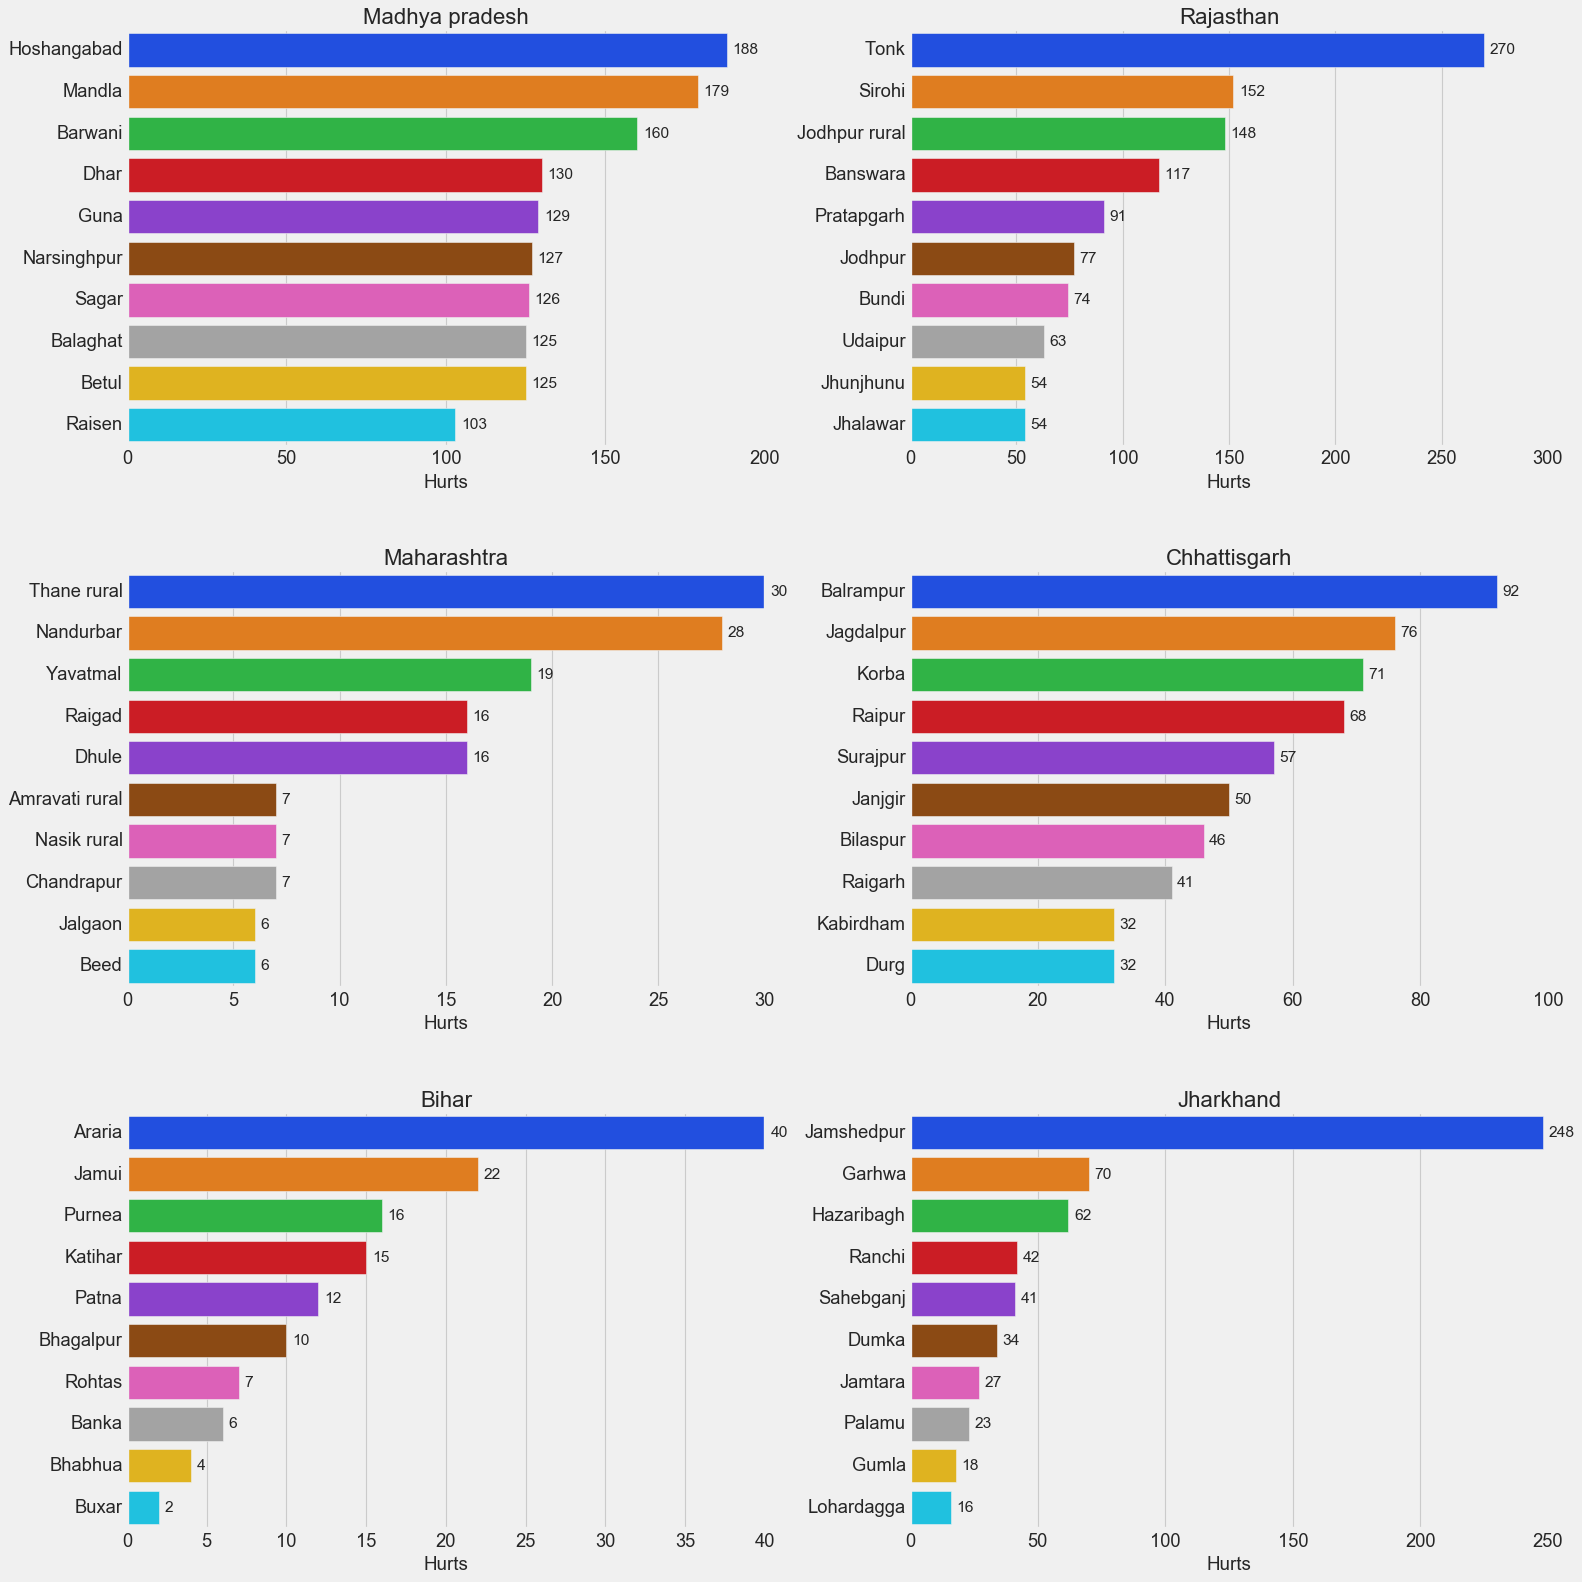

In [38]:
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Hurt', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Hurt' ,y= 'DISTRICT', palette = 'bright')
    plt.xlabel('Hurts')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Crimes registered under Prevention of atrocities (POA) Act distribution State and District wise

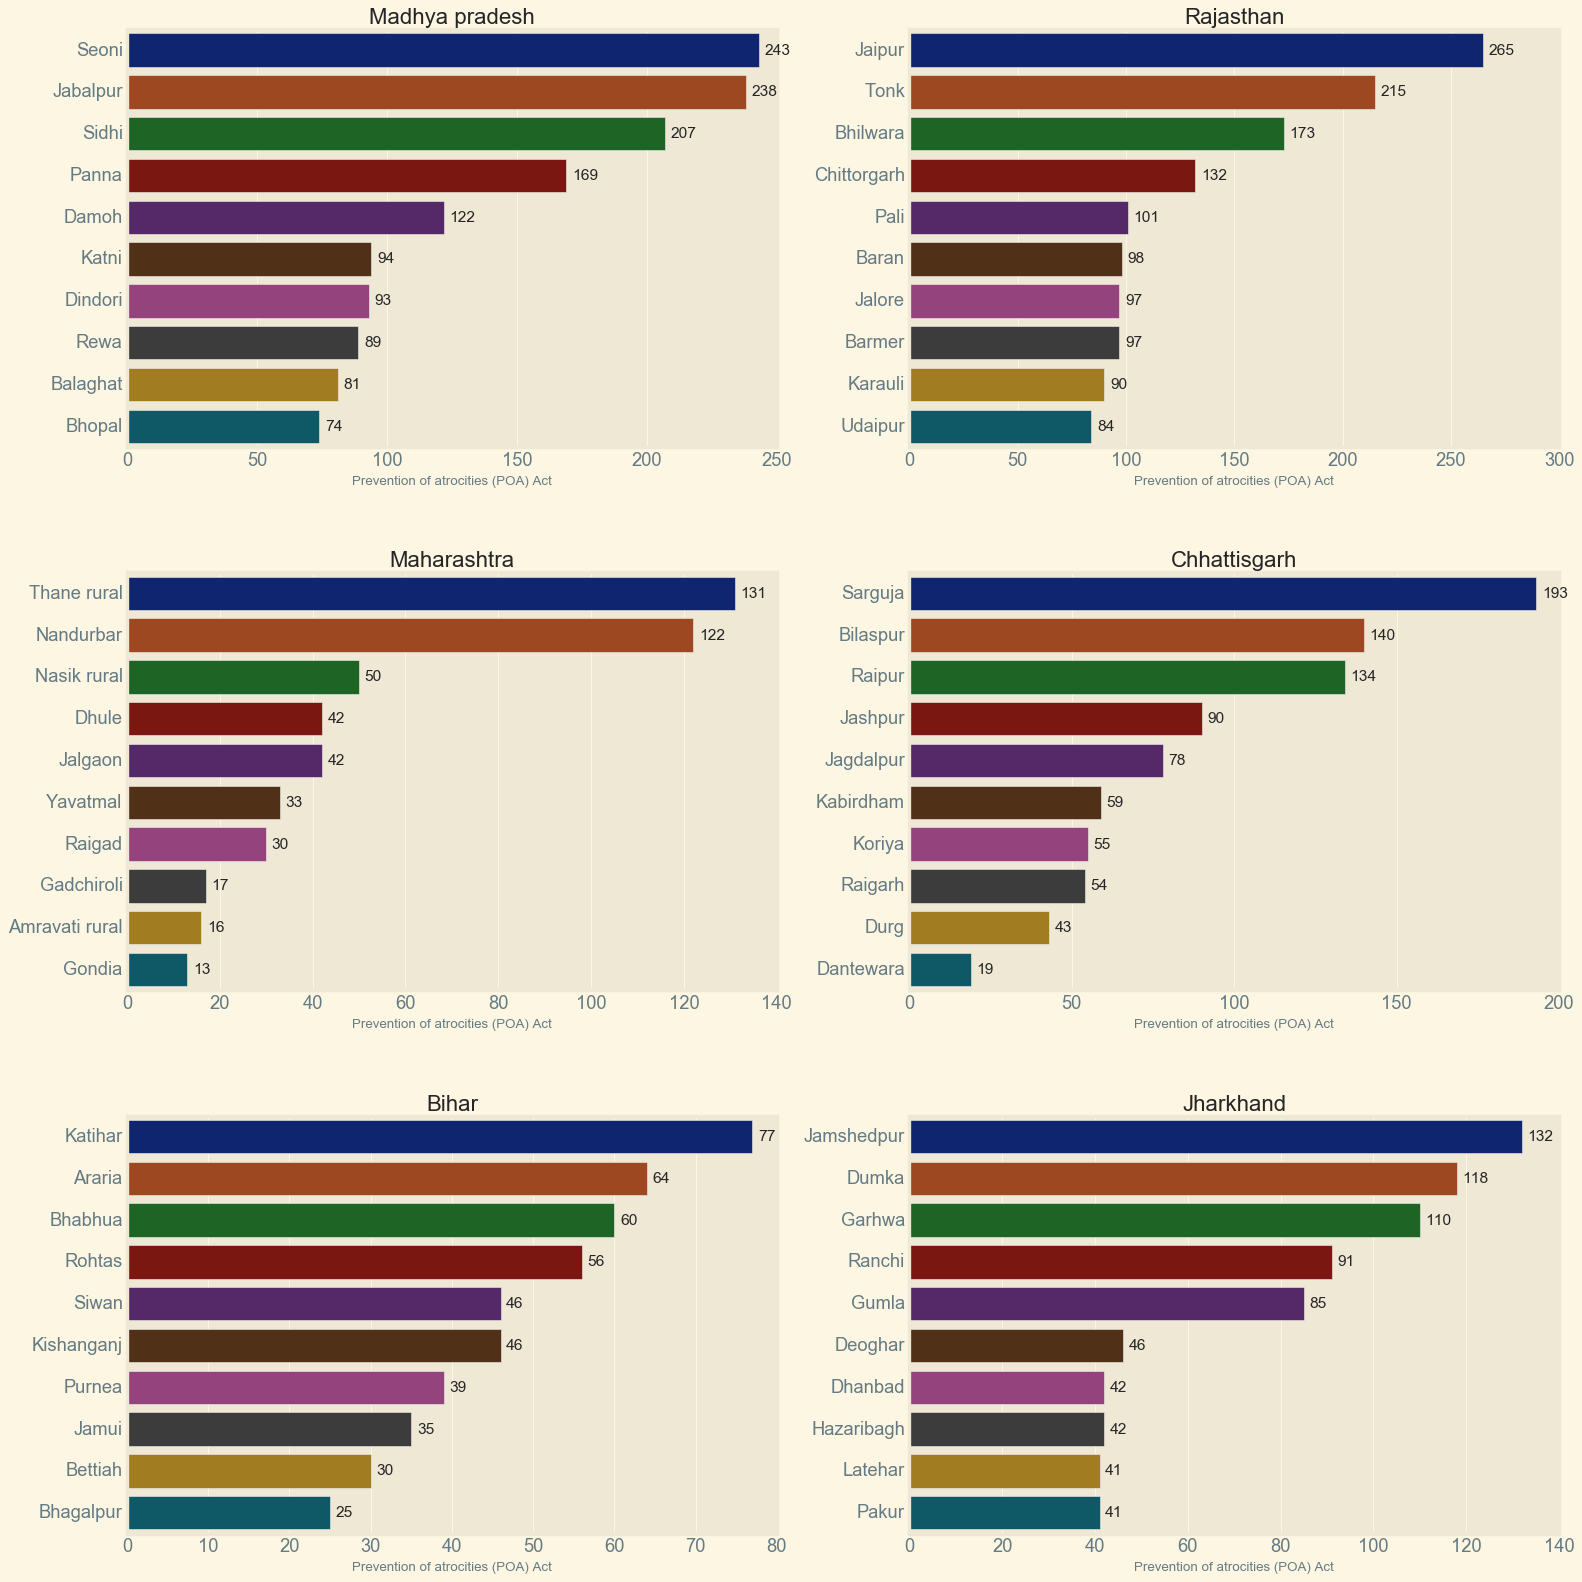

In [39]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,20))
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Prevention of atrocities (POA) Act', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Prevention of atrocities (POA) Act' ,y= 'DISTRICT', palette = 'dark' )
    plt.xlabel('Prevention of atrocities (POA) Act')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Other crime distribution among States and Districts

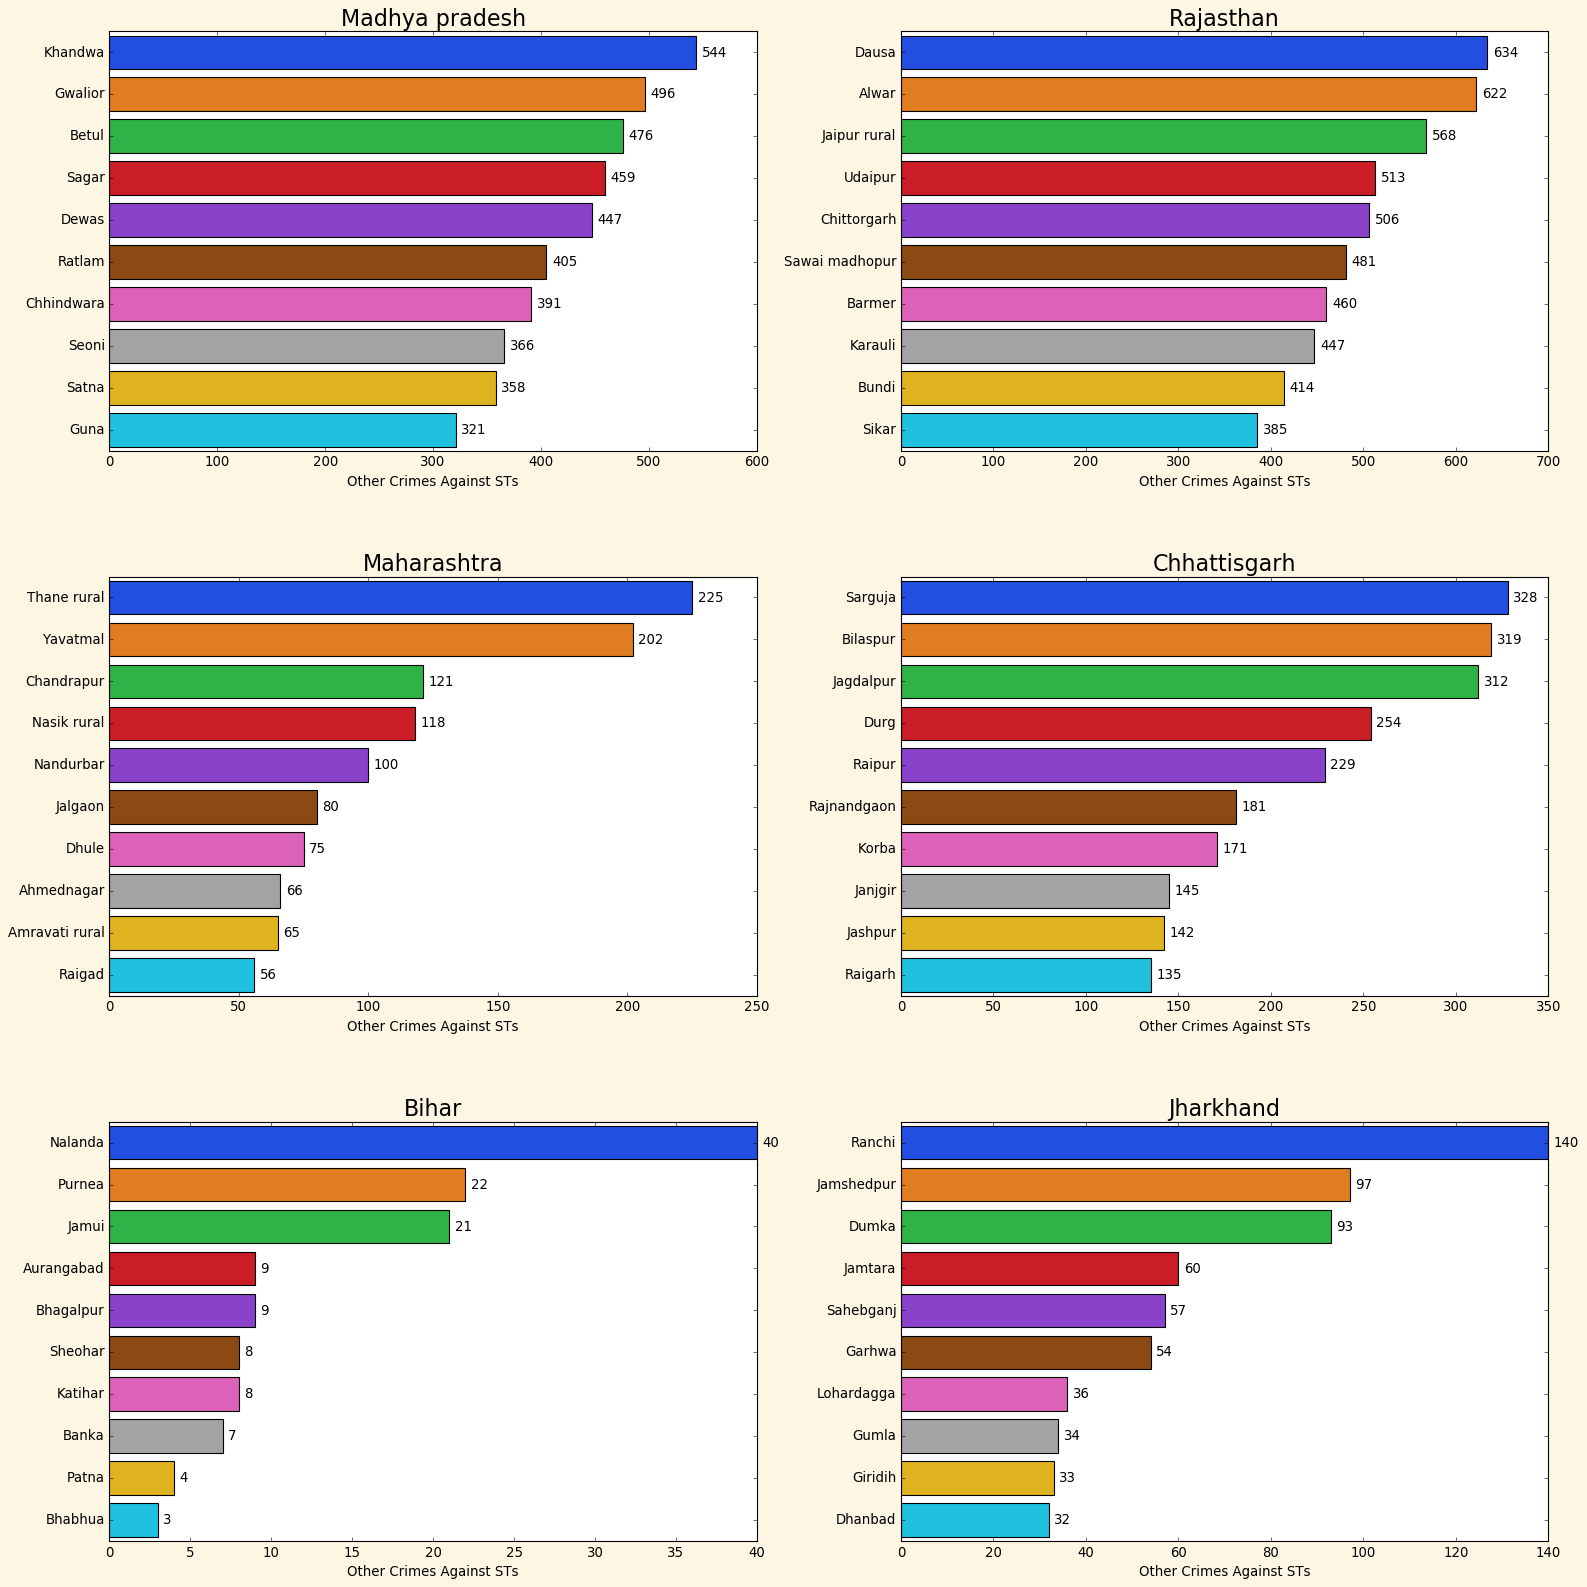

In [40]:
plt.figure(figsize=(20,20))
plt.style.use('classic')
for i , state in enumerate(states):
    scsd1 = scsd[scsd['STATE/UT'] == state].sort_values('Other Crimes Against STs', ascending = False)
    scsd1 = scsd1.head(10)
    plt.subplot(3,2,i+1)
    ax = sns.barplot(data= scsd1,x= 'Other Crimes Against STs' ,y= 'DISTRICT', palette = 'bright' )
    plt.xlabel('Other Crimes Against STs')
    plt.ylabel('')
    plt.title(state.capitalize(),size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
         
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# Conclusion
Despite numerous efforts by the government, the education system and the soociety
- Rajasthan ,Uttarpradesh , Bihar ,Maharashtra and Rajasthan seem to be hotspot for crimes against Schedule Caste Community
- Madhya Pradesh, Rajasthan, Andhra Pradesh, Odisha and Chattisgarh remain hotspot for crimes against Schedule Tribe Community